In [128]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = [25, 10]
import math
import os
#from tabulate import tabulate




custom_style_gold = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#FFFFF0',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 15,
    'legend.fontsize': 12,
    'grid.color': '#E6DAA6',
}

custom_style_Lavender = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#E6E6FA',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 15,
    'legend.fontsize': 12,
    'grid.color': '#C79FEF',
}



In [12]:
# this is the metadata which has been used to predict the metallicity. This data is from Crestani et al.
# g band - light curves has been processed with the lcfit package.




In [ ]:
!python rrlfeh_nn.py @gfeh.par

# Only prediction:

### We implemented the prediction through changing the parameter file; therefore, it was mostly on the terminal. Here we can see their outputs presented by "target_g.out".

In [40]:
#This is the output prediction of G band Crestani data with LSTM model which was learnt on I band light curves.


file = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani/target_g.out'

data = []
with open(file, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

df_pre = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
df_pre.columns = {'source_id': '0', 'FeH_pre': '1', 'FeHerr_pre': '2'}
print(df_pre.source_id)
print('non duplicate source ids: ', len(df_pre.source_id.unique()))


0      6380659528686603008
1      5412243359495900928
2      4055098870077726976
3      2973954279102006656
4      5032510629236996608
              ...         
271    6378877082899249664
272    4473628559603349888
273    3839232130153219456
274    6897755139944897024
275    6589892159047076096
Name: source_id, Length: 276, dtype: int64
non duplicate source ids:  72


In [42]:
# the model has introduced some duplicated source ids!

df_pre[df_pre.source_id.duplicated()].sort_values('source_id')

source_id   FeH_pre  FeHerr_pre
267   630421935431871232 -1.415770    0.029152
195   630421935431871232 -1.415770    0.029152
174  1191510003353849472 -0.868451    0.121120
102  1191510003353849472 -0.868451    0.121120
246  1191510003353849472 -0.868451    0.121120
..                   ...       ...         ...
202  6897755139944897024 -2.235285    0.053723
274  6897755139944897024 -2.235285    0.053723
83   6910611591970329216 -0.362368    0.057885
227  6910611591970329216 -0.362368    0.057885
155  6910611591970329216 -0.362368    0.057885

[204 rows x 3 columns]

In [43]:
df_pre.drop_duplicates(inplace = True)
df_pre.set_index('source_id')

FeH_pre  FeHerr_pre
source_id                                
6380659528686603008 -2.132652    0.045187
5412243359495900928 -1.733289    0.051593
4055098870077726976 -1.346272    0.067951
2973954279102006656 -2.070626    0.039340
5032510629236996608 -2.077178    0.022992
...                       ...         ...
6378877082899249664 -0.389370    0.043459
4473628559603349888 -0.480036    0.084937
3839232130153219456 -1.645336    0.029011
6897755139944897024 -2.235285    0.053723
6589892159047076096 -2.818283    0.174545

[72 rows x 2 columns]

## True Label:

In [44]:
# These are the metallcities of Crestani dataset with HDS measurement.

df_true = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani_new.csv')

df_true = df_true[['source_id', 'FeH', 'FeH_err']]
df_true.set_index('source_id')

FeH  FeH_err
source_id                         
6380659528686603008 -1.86     0.01
5412243359495900928 -1.84     0.09
4055098870077726976 -1.30     0.11
6735230515154698880 -0.17     0.04
2973954279102006656 -1.66     0.11
...                   ...      ...
4473628559603349888 -0.63     0.04
3839232130153219456 -1.25     0.04
6897755139944897024 -1.42     0.09
6836508627130440064 -2.44     0.03
6589892159047076096 -2.37     0.04

[95 rows x 2 columns]

In [45]:
result = pd.merge(df_true, df_pre, how = 'inner', on = 'source_id')
result.to_csv('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani/only_Metal_T_pre_Crestani.csv')

RMSE: 0.2563604822388508


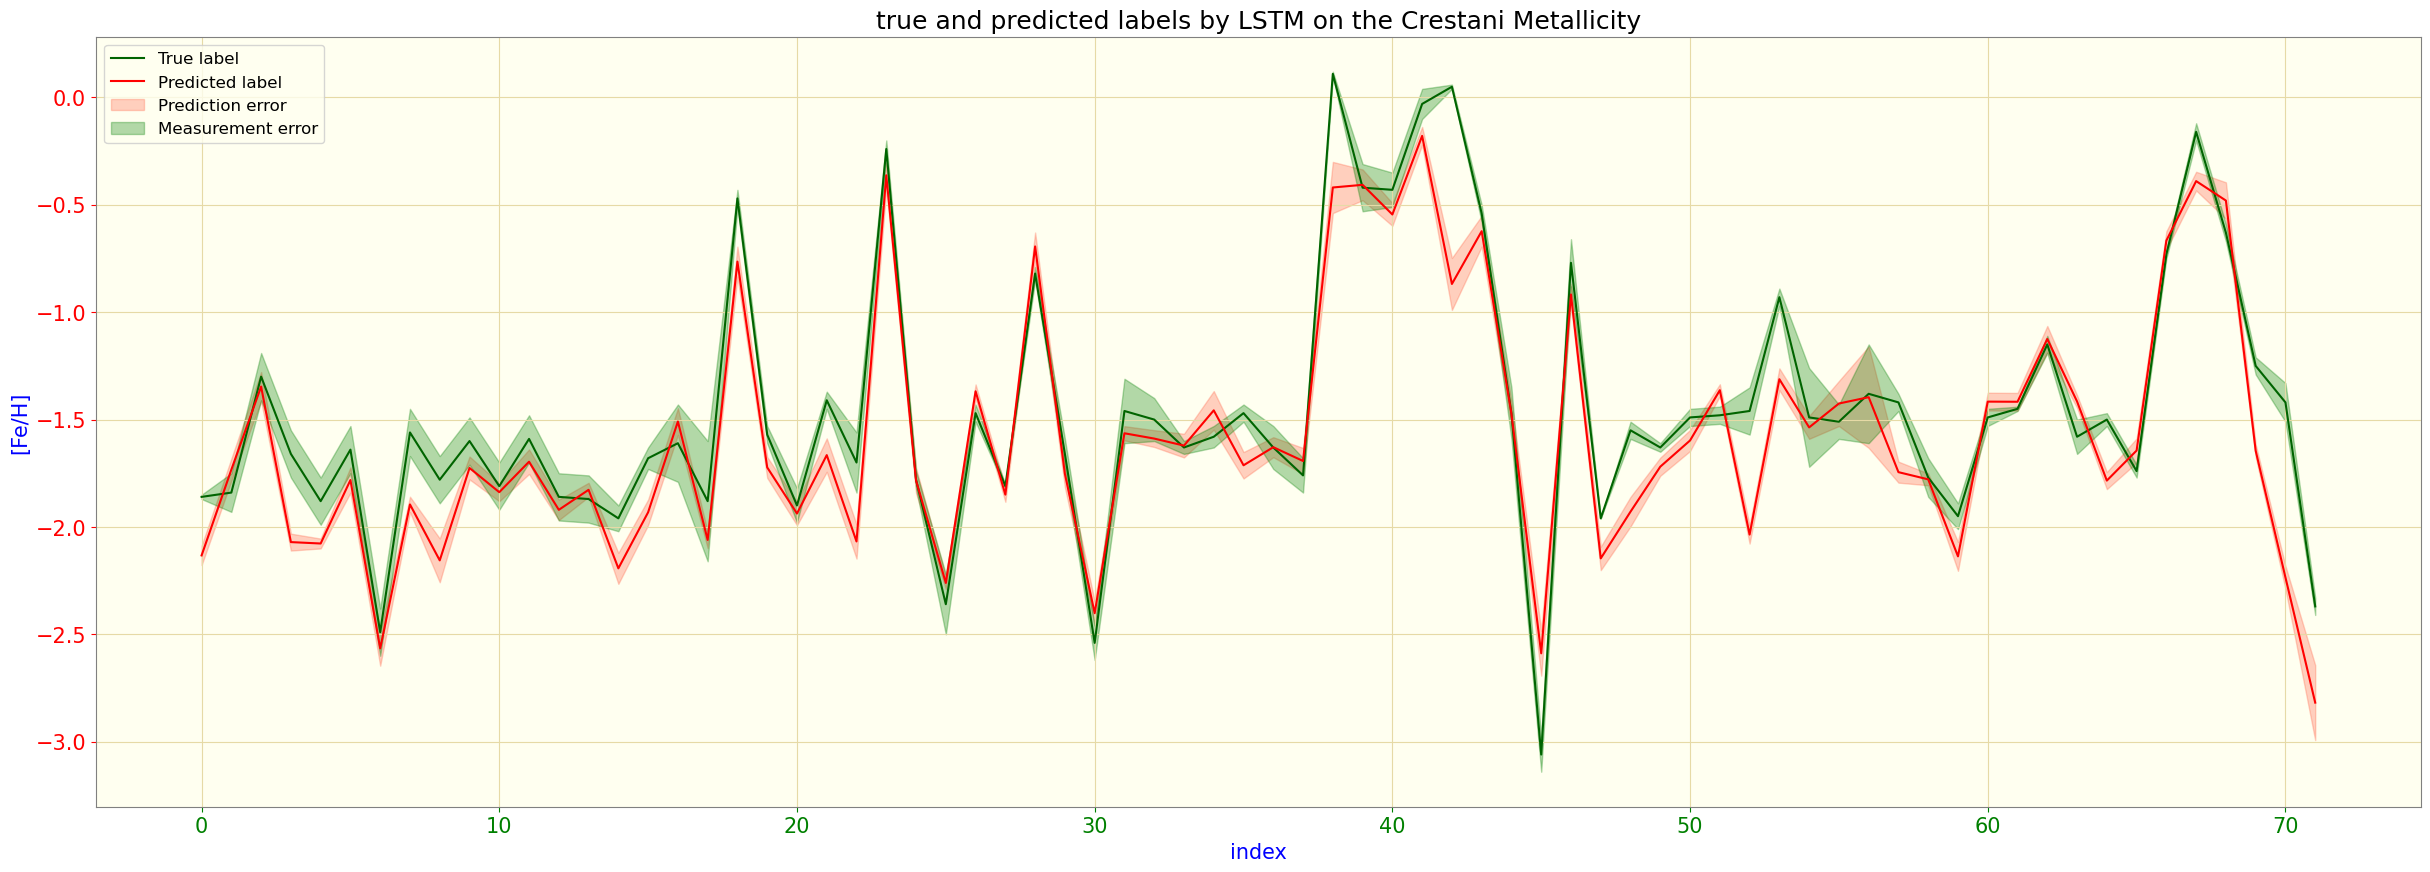

In [143]:
# This is between the true labels and predicted labels for LSTM prediction on Crestani data.

fig, ax = plt.subplots()


plt.style.use(custom_style_gold)


ax.plot(result.index, result.FeH, color = 'darkgreen', label = 'True label')
ax.plot(result.index, result.FeH_pre, color='red', label = 'Predicted label')

ax.fill_between(result.index, result.FeH_pre - result.FeHerr_pre, result.FeH_pre + result.FeHerr_pre,
                 color='tomato', alpha=0.3, label = 'Prediction error')

ax.fill_between(result.index, result.FeH - result.FeH_err, result.FeH + result.FeH_err,
                 color='green', alpha=0.3, label = 'Measurement error')

ax.set_xlabel('index')
ax.set_ylabel('[Fe/H]')
ax.set_title('true and predicted labels by LSTM on the Crestani Metallicity')
ax.grid(True)

ax.legend()


print('RMSE:', np.sqrt(mean_squared_error(result.FeH, result.FeH_pre)))

plt.savefig('LSTM_one.png', dpi=300)

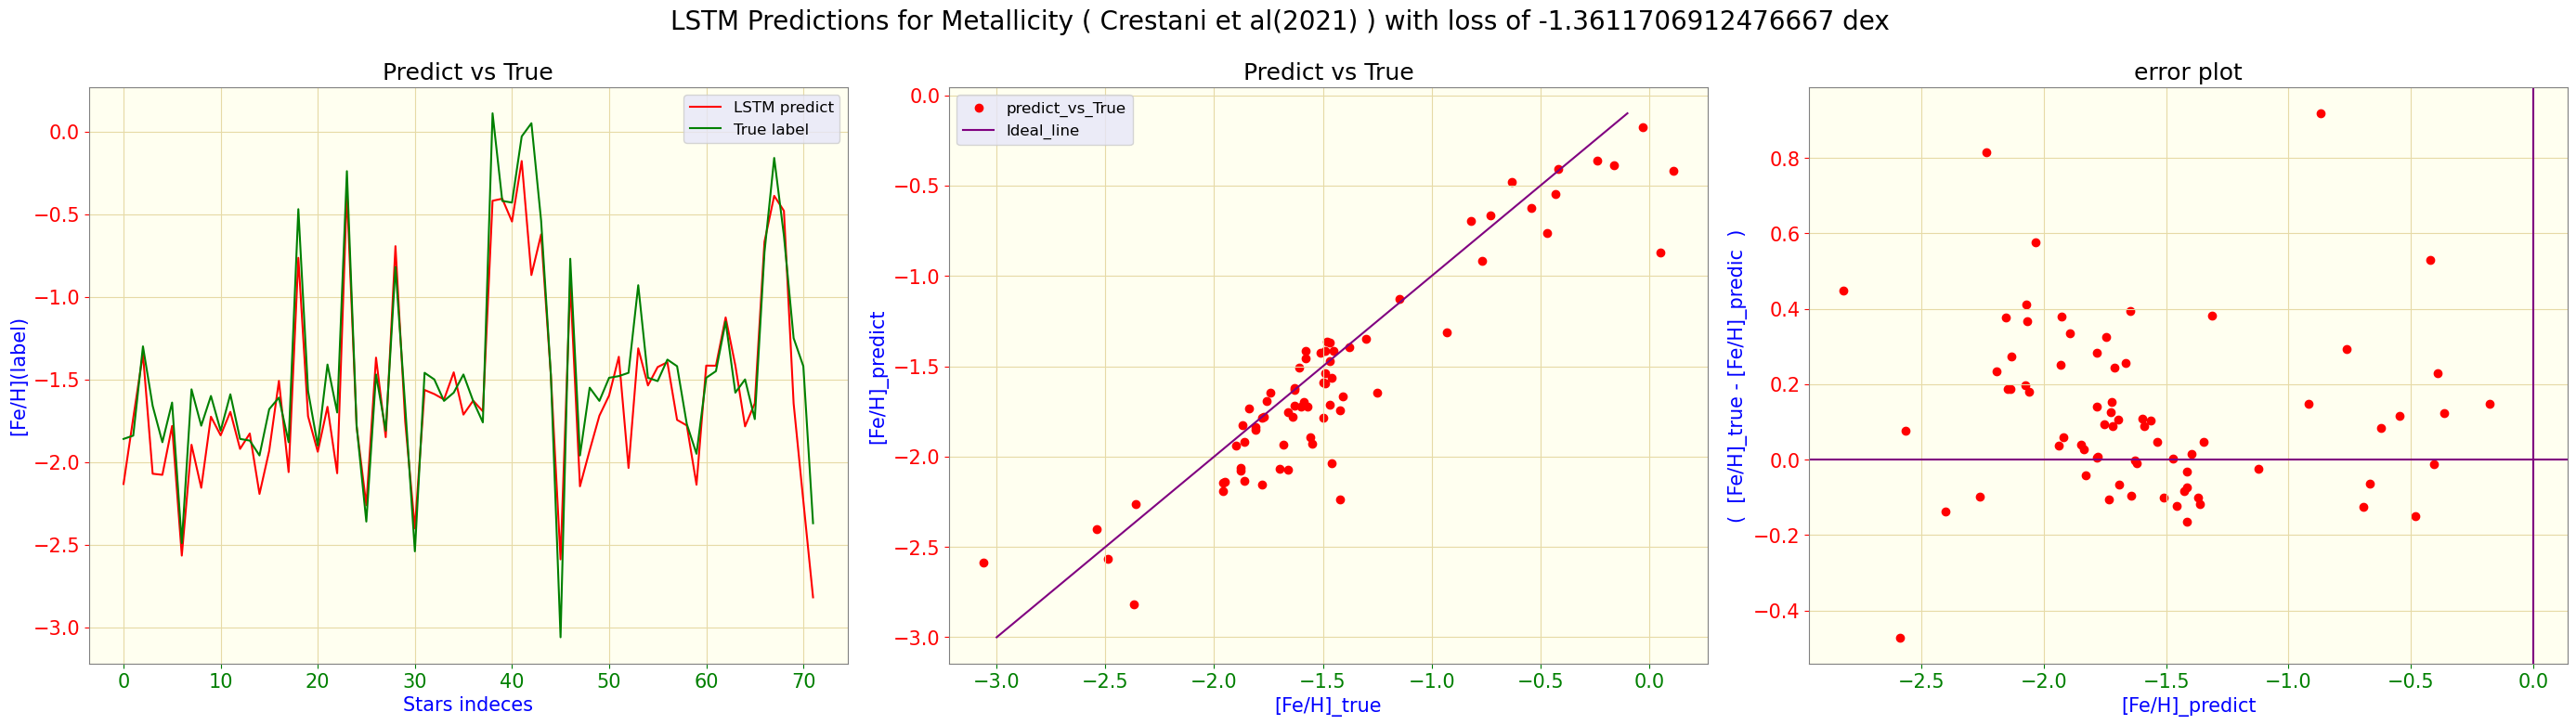

In [135]:
plt.rcParams['figure.figsize'] = [28, 8]
fig, ax = plt.subplots(1, 3)
plt.style.use(custom_style_Lavender)

ax[0].plot(result.index, result.FeH_pre, color = 'red', label = 'LSTM predict')
ax[0].plot(result.index, result.FeH, color = 'green', label= 'True label')
ax[0].grid(True)
ax[0].set_xlabel('Stars indeces')
ax[0].set_ylabel('[Fe/H](label)')
ax[0].set_title('Predict vs True')
ax[0].legend()

ax[1].scatter(result.FeH, result.FeH_pre, label = 'predict_vs_True', color = 'red')
ax[1].plot([x / 10 for x in range(-30, 0)], [x / 10 for x in range(-30, 0)], color = 'purple', label = 'Ideal_line')
ax[1].set_xlabel('[Fe/H]_true')
ax[1].set_ylabel('[Fe/H]_predict')
ax[1].grid(True)
ax[1].set_title('Predict vs True')
ax[1].legend()


ax[2].scatter(result.FeH_pre , result.FeH - result.FeH_pre, color = 'red')
ax[2].axhline(y = 0, color = 'purple')
ax[2].axvline(x = 0, color = 'purple')
ax[2].set_xlabel('[Fe/H]_predict')
ax[2].set_ylabel('(  [Fe/H]_true - [Fe/H]_predic  )')
ax[2].set_title('error plot')
ax[2].grid(True)

mse = mean_squared_error(result.FeH, result.FeH_pre)

rmse = math.sqrt(mse)

log_rmse = math.log(rmse)

fig.suptitle(f'LSTM Predictions for Metallicity ( Crestani et al(2021) ) with loss of {log_rmse} dex  ', fontsize=20)

plt.tight_layout()

plt.savefig('LSTM.png', dpi=300)



# The same prediction but this time with GRU:



In [144]:
# GRU pretrained model on I band light curve. Here we tried to predict the Crestani's dataset with it.

file = '/Users/melikakeshavarz/Desktop/GRU/Deep/Crestani/target_g.out'

data = []
with open(file, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

df_pre_G = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
df_pre_G.columns = {'source_id': '0', 'FeH_pre': '1', 'FeHerr_pre': '2'}

print('non duplicate source ids: ', len(df_pre_G.source_id.unique()))
df_pre_G

non duplicate source ids:  72


source_id   FeH_pre  FeHerr_pre
0    6380659528686603008 -2.114941    0.043829
1    5412243359495900928 -1.651982    0.065342
2    4055098870077726976 -1.294043    0.066589
3    2973954279102006656 -2.079884    0.032438
4    5032510629236996608 -2.084001    0.024685
..                   ...       ...         ...
271  6378877082899249664 -0.378399    0.040335
272  4473628559603349888 -0.487938    0.055197
273  3839232130153219456 -1.670240    0.021702
274  6897755139944897024 -2.235157    0.040748
275  6589892159047076096 -2.977099    0.190590

[276 rows x 3 columns]

In [145]:
df_pre_G[df_pre_G.source_id.duplicated()].sort_values('source_id')
df_pre_G.drop_duplicates(inplace = True)
df_pre_G.set_index('source_id')

FeH_pre  FeHerr_pre
source_id                                
6380659528686603008 -2.114941    0.043829
5412243359495900928 -1.651982    0.065342
4055098870077726976 -1.294043    0.066589
2973954279102006656 -2.079884    0.032438
5032510629236996608 -2.084001    0.024685
...                       ...         ...
6378877082899249664 -0.378399    0.040335
4473628559603349888 -0.487938    0.055197
3839232130153219456 -1.670240    0.021702
6897755139944897024 -2.235157    0.040748
6589892159047076096 -2.977099    0.190590

[72 rows x 2 columns]

In [146]:
#TRUE labels
df_true = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani_new.csv')

df_true = df_true[['source_id', 'FeH', 'FeH_err']]
df_true.set_index('source_id')



# merging predict and true labels

result_G = pd.merge(df_true, df_pre_G, how = 'inner', on = 'source_id')

RMSE: 0.2655988667056122


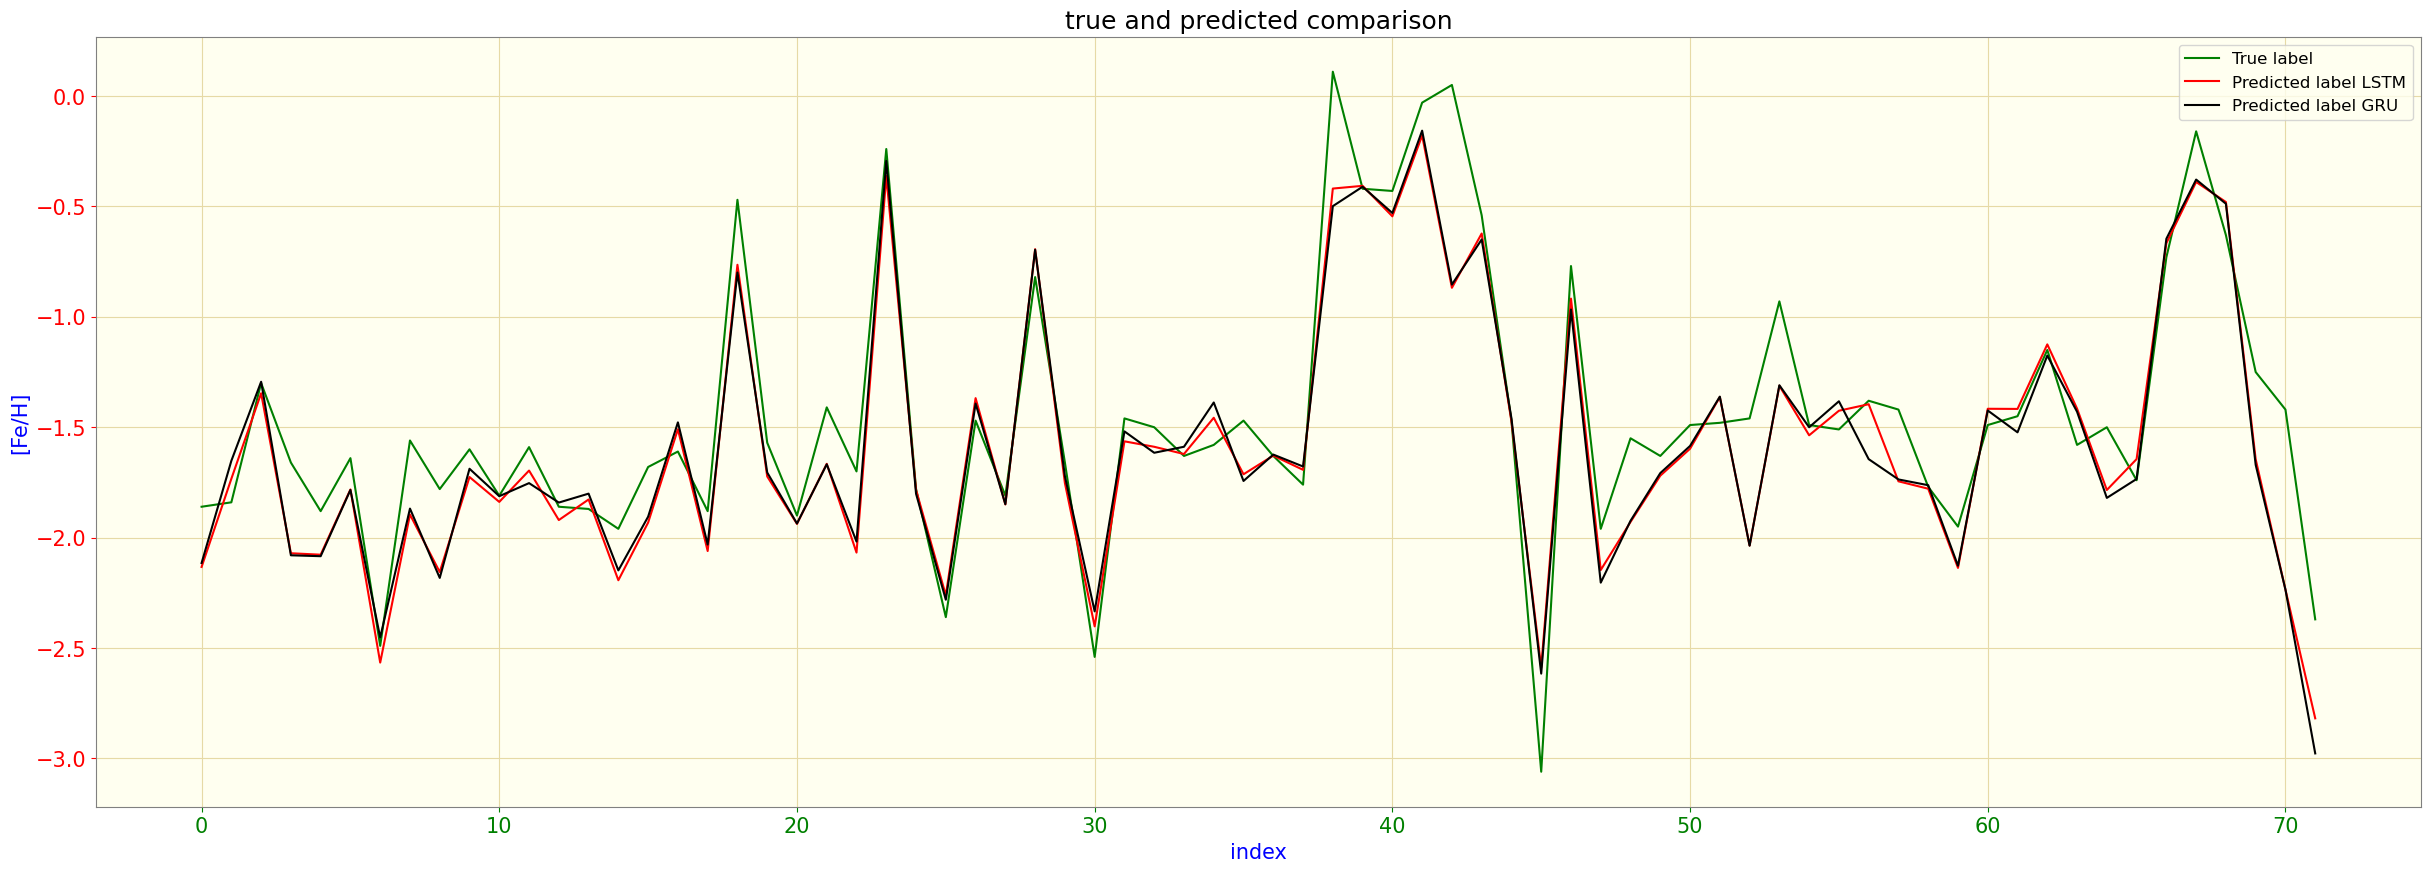

In [150]:
fig, ax = plt.subplots()


plt.style.use(custom_style_gold)


ax.plot(result.index, result.FeH, color = 'green', label = 'True label')
ax.plot(result.index, result.FeH_pre, color='red', label = 'Predicted label LSTM')
ax.plot(result_G.index, result_G.FeH_pre, color='black', label = 'Predicted label GRU')

#ax.fill_between(result.index, result.FeH_pre - result.FeHerr_pre, result.FeH_pre + result.FeHerr_pre,
#                 color='magenta', alpha=0.3, label = 'Prediction error')

#ax.fill_between(result.index, result.FeH - result.FeH_err, result.FeH + result.FeH_err,
#                 color='green', alpha=0.3, label = 'Measurement error')

ax.set_xlabel('index')
ax.set_ylabel('[Fe/H]')
ax.set_title('true and predicted comparison')
ax.grid(True)

ax.legend()


print('RMSE:', np.sqrt(mean_squared_error(result_G.FeH, result_G.FeH_pre)))

plt.savefig('GRU_one.png', dpi=300)


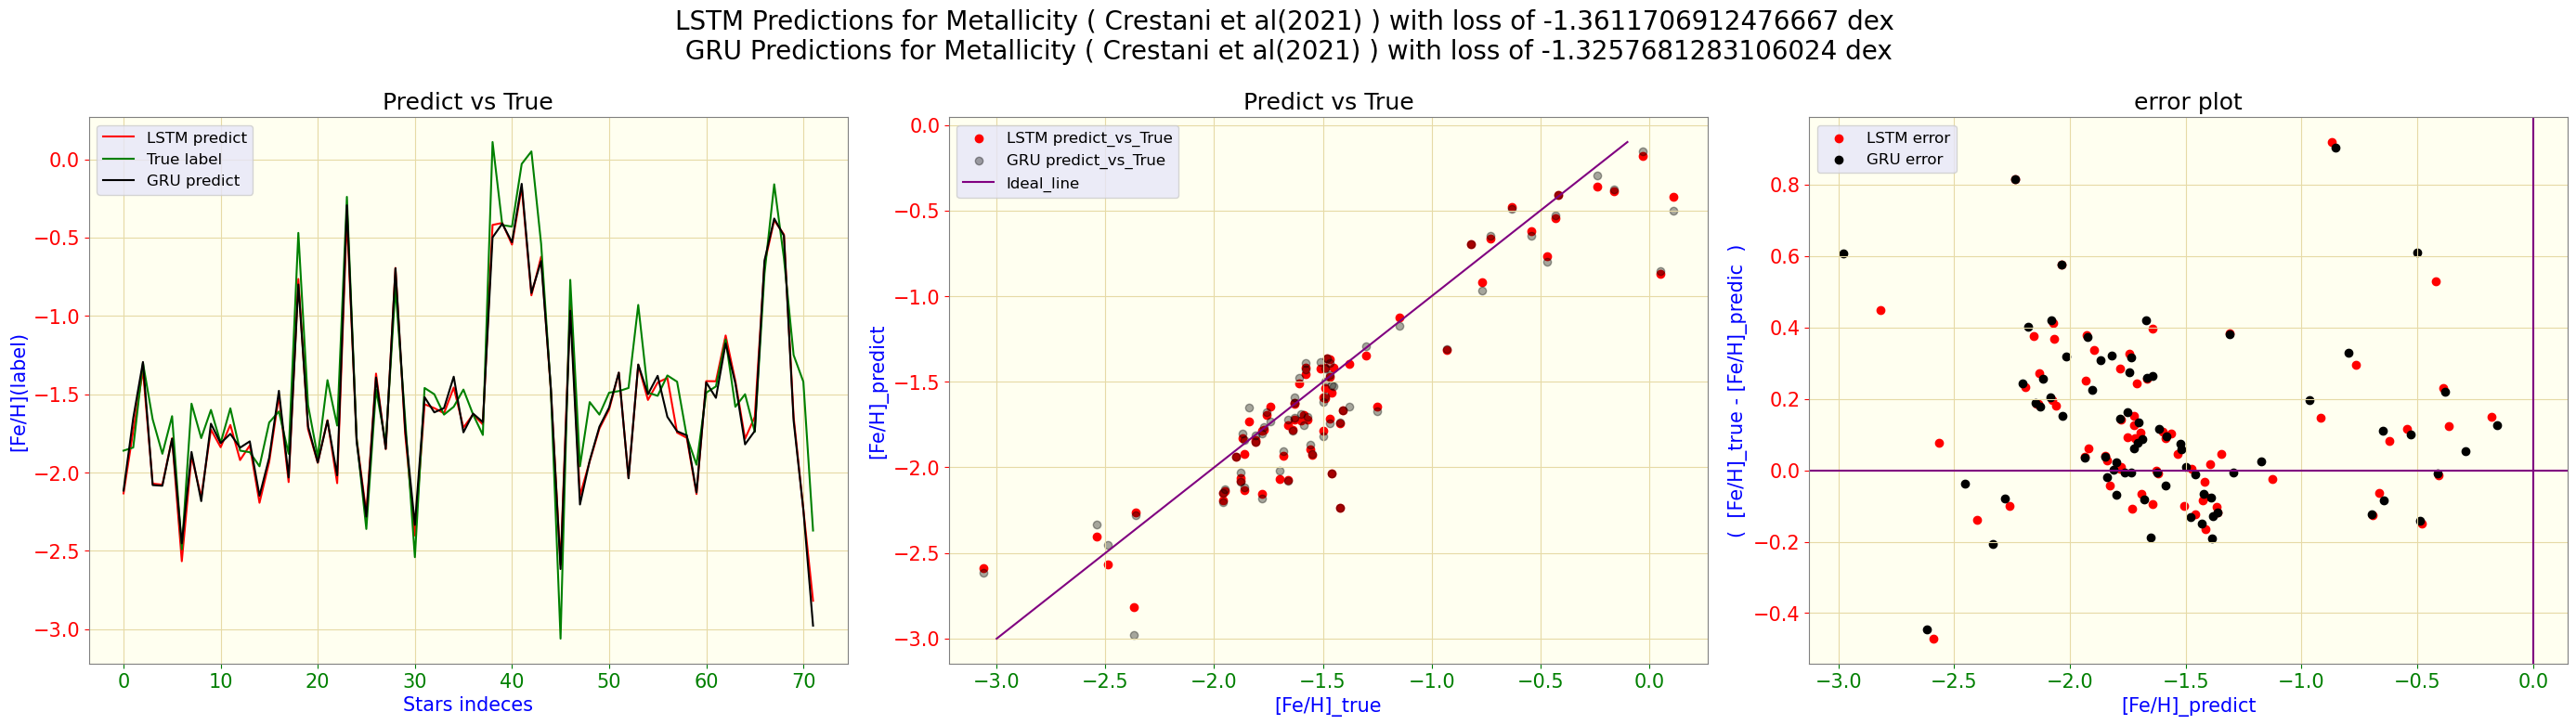

In [151]:
plt.rcParams['figure.figsize'] = [28, 8]
fig, ax = plt.subplots(1, 3)
plt.style.use(custom_style_Lavender)

ax[0].plot(result.index, result.FeH_pre, color = 'red', label = 'LSTM predict')
ax[0].plot(result.index, result.FeH, color = 'green', label= 'True label')
ax[0].plot(result_G.index, result_G.FeH_pre, color = 'black', label= 'GRU predict')
ax[0].grid(True)
ax[0].set_xlabel('Stars indeces')
ax[0].set_ylabel('[Fe/H](label)')
ax[0].set_title('Predict vs True')
ax[0].legend()

ax[1].scatter(result.FeH, result.FeH_pre, label = 'LSTM predict_vs_True', color = 'red')
ax[1].scatter(result_G.FeH, result_G.FeH_pre, label = 'GRU predict_vs_True', color = 'black', alpha = 0.35)
ax[1].plot([x / 10 for x in range(-30, 0)], [x / 10 for x in range(-30, 0)], color = 'purple', label = 'Ideal_line')
ax[1].set_xlabel('[Fe/H]_true')
ax[1].set_ylabel('[Fe/H]_predict')
ax[1].grid(True)
ax[1].set_title('Predict vs True')
ax[1].legend()


ax[2].scatter(result.FeH_pre , result.FeH - result.FeH_pre, label = 'LSTM error', color = 'red')
ax[2].scatter(result_G.FeH_pre , result_G.FeH - result_G.FeH_pre, label = 'GRU error', color = 'black')
ax[2].axhline(y = 0, color = 'purple')
ax[2].axvline(x = 0, color = 'purple')
ax[2].legend()
ax[2].set_xlabel('[Fe/H]_predict')
ax[2].set_ylabel('(  [Fe/H]_true - [Fe/H]_predic  )')
ax[2].set_title('error plot')
ax[2].grid(True)

mse = mean_squared_error(result.FeH, result.FeH_pre)

rmse = math.sqrt(mse)

log_rmse = math.log(rmse)

#---- for GRU--------
mse_G = mean_squared_error(result_G.FeH, result_G.FeH_pre)

rmse_G = math.sqrt(mse_G)

log_rmse_G = math.log(rmse_G)

fig.suptitle(f'LSTM Predictions for Metallicity ( Crestani et al(2021) ) with loss of {log_rmse} dex \n GRU Predictions for Metallicity ( Crestani et al(2021) ) with loss of {log_rmse_G} dex ', fontsize=20)

plt.tight_layout()

plt.savefig('GRU.png', dpi=300)


# –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

# Transfer learning on Crestani dataset:


#### The codes for transfer learning are provided at the end of this notebook.

In [55]:
# We took the pretrained LSTM model which was trained on I band dataset, and transfer learnt on Crestani's G band data.
import io


file = '/Users/melikakeshavarz/Desktop/send/Crestani_T/target_g.out'

data = []
with open(file, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

df_pre_TL = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
df_pre_TL.columns = {'source_id': '0', 'FeH_pre': '1', 'FeHerr_pre': '2'}
print(df_pre_TL.source_id)
print('non duplicate source ids: ', len(df_pre_TL.source_id.unique()))

0     6380659528686603008
1     5412243359495900928
2     4055098870077726976
3     6735230515154698880
4     2973954279102006656
             ...         
90    4473628559603349888
91    3839232130153219456
92    6897755139944897024
93    6836508627130440064
94    6589892159047076096
Name: source_id, Length: 95, dtype: int64
non duplicate source ids:  95


In [56]:
df_pre_TL.rename(columns={'FeH_pre' :  'FeH_pre_TL', 'FeHerr_pre': 'FeHerr_pre_TL'}, inplace = True)

In [57]:
df_true = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani_new.csv')

df_true = df_true[['source_id', 'FeH', 'FeH_err']]
df_true.set_index('source_id')



# merging predict and true labels

result_TL = pd.merge(df_pre, df_pre_TL, how = 'inner', on = 'source_id')

In [58]:
result_TL

source_id   FeH_pre  FeHerr_pre  FeH_pre_TL  FeHerr_pre_TL
0   6380659528686603008 -2.132652    0.045187   -1.977431       0.097390
1   5412243359495900928 -1.733289    0.051593   -1.796929       0.069398
2   4055098870077726976 -1.346272    0.067951   -1.343992       0.036711
3   2973954279102006656 -2.070626    0.039340   -2.015787       0.063596
4   5032510629236996608 -2.077178    0.022992   -2.032191       0.053131
..                  ...       ...         ...         ...            ...
67  6378877082899249664 -0.389370    0.043459   -0.304625       0.108637
68  4473628559603349888 -0.480036    0.084937   -0.434550       0.077879
69  3839232130153219456 -1.645336    0.029011   -1.594924       0.051318
70  6897755139944897024 -2.235285    0.053723   -2.159869       0.105522
71  6589892159047076096 -2.818283    0.174545   -2.687745       0.149467

[72 rows x 5 columns]

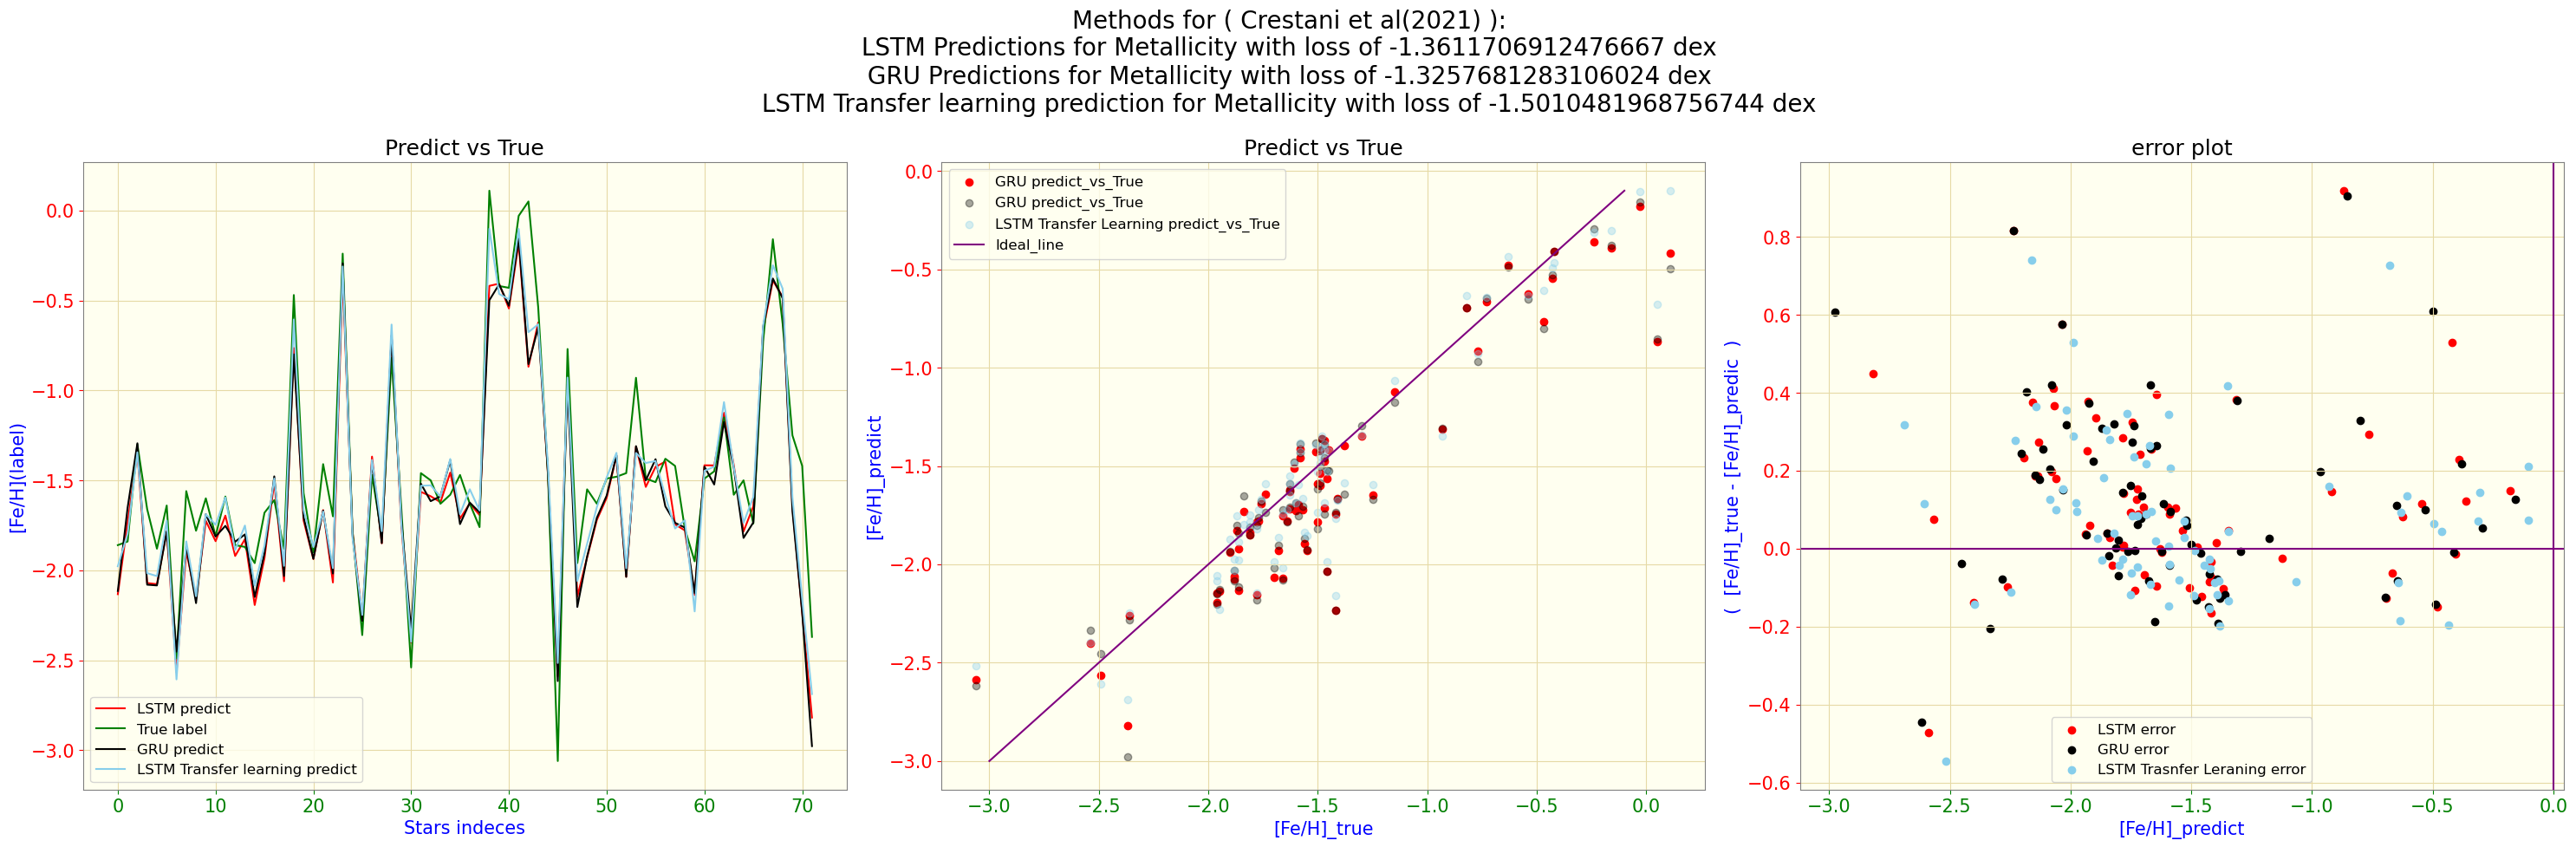

In [137]:
plt.rcParams['figure.figsize'] = [30, 10]
fig, ax = plt.subplots(1, 3)
plt.style.use(custom_style_gold)

ax[0].plot(result.index, result.FeH_pre, color = 'red', label = 'LSTM predict')
ax[0].plot(result.index, result.FeH, color = 'green', label= 'True label')
ax[0].plot(result_G.index, result_G.FeH_pre, color = 'black', label= 'GRU predict')
ax[0].plot(result_TL.index, result_TL.FeH_pre_TL, color = 'skyblue', label = 'LSTM Transfer learning predict')

ax[0].grid(True)
ax[0].set_xlabel('Stars indeces')
ax[0].set_ylabel('[Fe/H](label)')
ax[0].set_title('Predict vs True')
ax[0].legend(fontsize=12)

ax[1].scatter(result.FeH, result.FeH_pre, label = 'GRU predict_vs_True', color = 'red')
ax[1].scatter(result_G.FeH, result_G.FeH_pre, label = 'GRU predict_vs_True', color = 'black', alpha = 0.35)
ax[1].scatter(result.FeH, result_TL.FeH_pre_TL, label = 'LSTM Transfer Learning predict_vs_True', color = 'skyblue', alpha = 0.35)
ax[1].plot([x / 10 for x in range(-30, 0)], [x / 10 for x in range(-30, 0)], color = 'purple', label = 'Ideal_line')
ax[1].set_xlabel('[Fe/H]_true')
ax[1].set_ylabel('[Fe/H]_predict')
ax[1].grid(True)
ax[1].set_title('Predict vs True')
ax[1].legend(fontsize=12)


ax[2].scatter(result.FeH_pre , result.FeH - result.FeH_pre, label = 'LSTM error', color = 'red')
ax[2].scatter(result_G.FeH_pre , result_G.FeH - result_G.FeH_pre, label = 'GRU error', color = 'black')
ax[2].scatter(result_TL.FeH_pre_TL , result.FeH - result_TL.FeH_pre_TL, label = 'LSTM Trasnfer Leraning error', color = 'skyblue')
ax[2].axhline(y = 0, color = 'purple')
ax[2].axvline(x = 0, color = 'purple')
ax[2].legend(fontsize=12)
ax[2].set_xlabel('[Fe/H]_predict')
ax[2].set_ylabel('(  [Fe/H]_true - [Fe/H]_predic  )')
ax[2].set_title('error plot')
ax[2].grid(True)

mse = mean_squared_error(result.FeH, result.FeH_pre)

rmse = math.sqrt(mse)

log_rmse = math.log(rmse)

#------------------- mean squared error ---------------

#---- for GRU--------
mse_G = mean_squared_error(result_G.FeH, result_G.FeH_pre)

rmse_G = math.sqrt(mse_G)

log_rmse_G = math.log(rmse_G)

#----- for TL LSTM ------
mse_TL = mean_squared_error(result.FeH, result_TL.FeH_pre_TL)

rmse_TL = math.sqrt(mse_TL)

log_rmse_TL = math.log(rmse_TL)



fig.suptitle(f'Methods for ( Crestani et al(2021) ):\n LSTM Predictions for Metallicity with loss of {log_rmse} dex \n GRU Predictions for Metallicity with loss of {log_rmse_G} dex \n LSTM Transfer learning prediction for Metallicity with loss of {log_rmse_TL} dex ', fontsize=20)

plt.tight_layout()
plt.savefig('LSTM_GRU_TL.png', dpi=300)


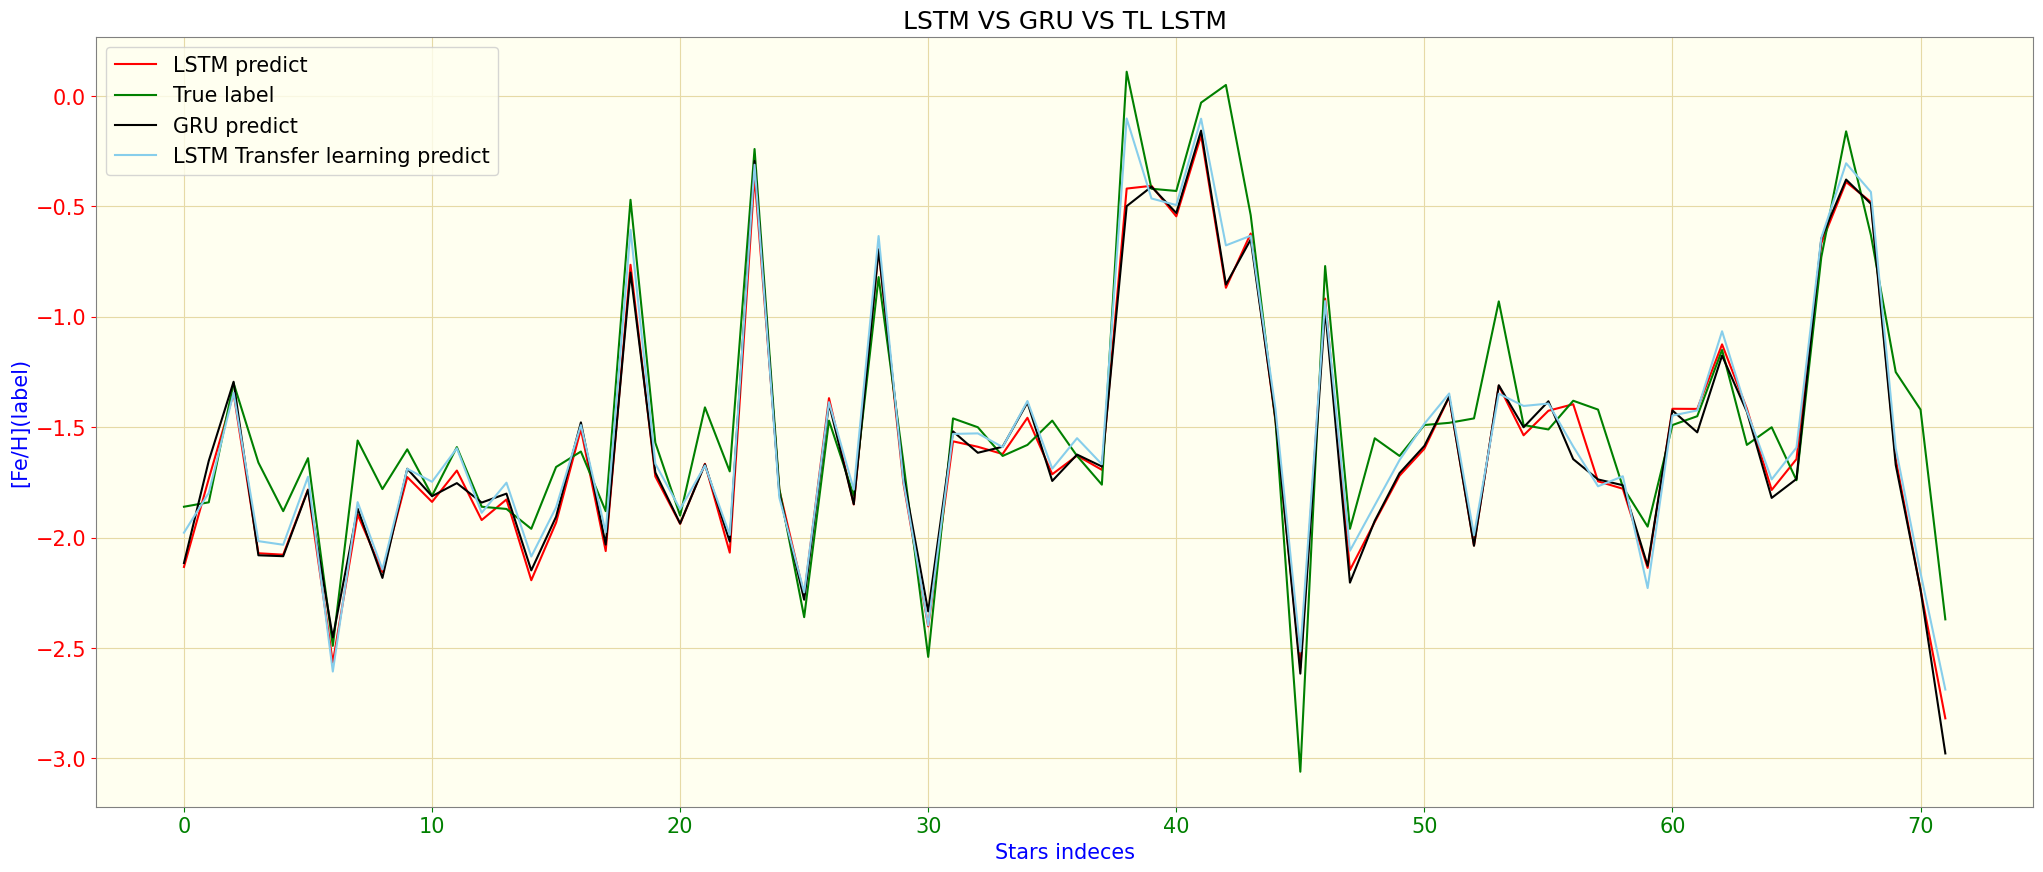

In [133]:
plt.plot(result.index, result.FeH_pre, color = 'red', label = 'LSTM predict')
plt.plot(result.index, result.FeH, color = 'green', label= 'True label')
plt.plot(result_G.index, result_G.FeH_pre, color = 'black', label= 'GRU predict')
plt.plot(result_TL.index, result_TL.FeH_pre_TL, color = 'skyblue', label = 'LSTM Transfer learning predict')


plt.grid(True)
plt.xlabel('Stars indeces')
plt.ylabel('[Fe/H](label)')
plt.title('LSTM VS GRU VS TL LSTM')
plt.legend(fontsize=15)
plt.savefig('LSTM_VS_GRU_VS_TL_test.png', dpi=300)


In [111]:
result_test_TL.head(3)



source_id  True_test  predict_test   FeH_pre  FeHerr_pre  \
0  2973463347160718976      -1.88     -1.975314 -2.060652    0.038212   
1  2981136563934324224      -1.51     -1.392742 -1.425245    0.104820   
2  4985455998336183168      -1.38     -1.587165 -1.395739    0.236064   

   FeH_pre_TL  FeHerr_pre_TL  
0   -1.975314       0.054230  
1   -1.392742       0.025117  
2   -1.587165       0.124673

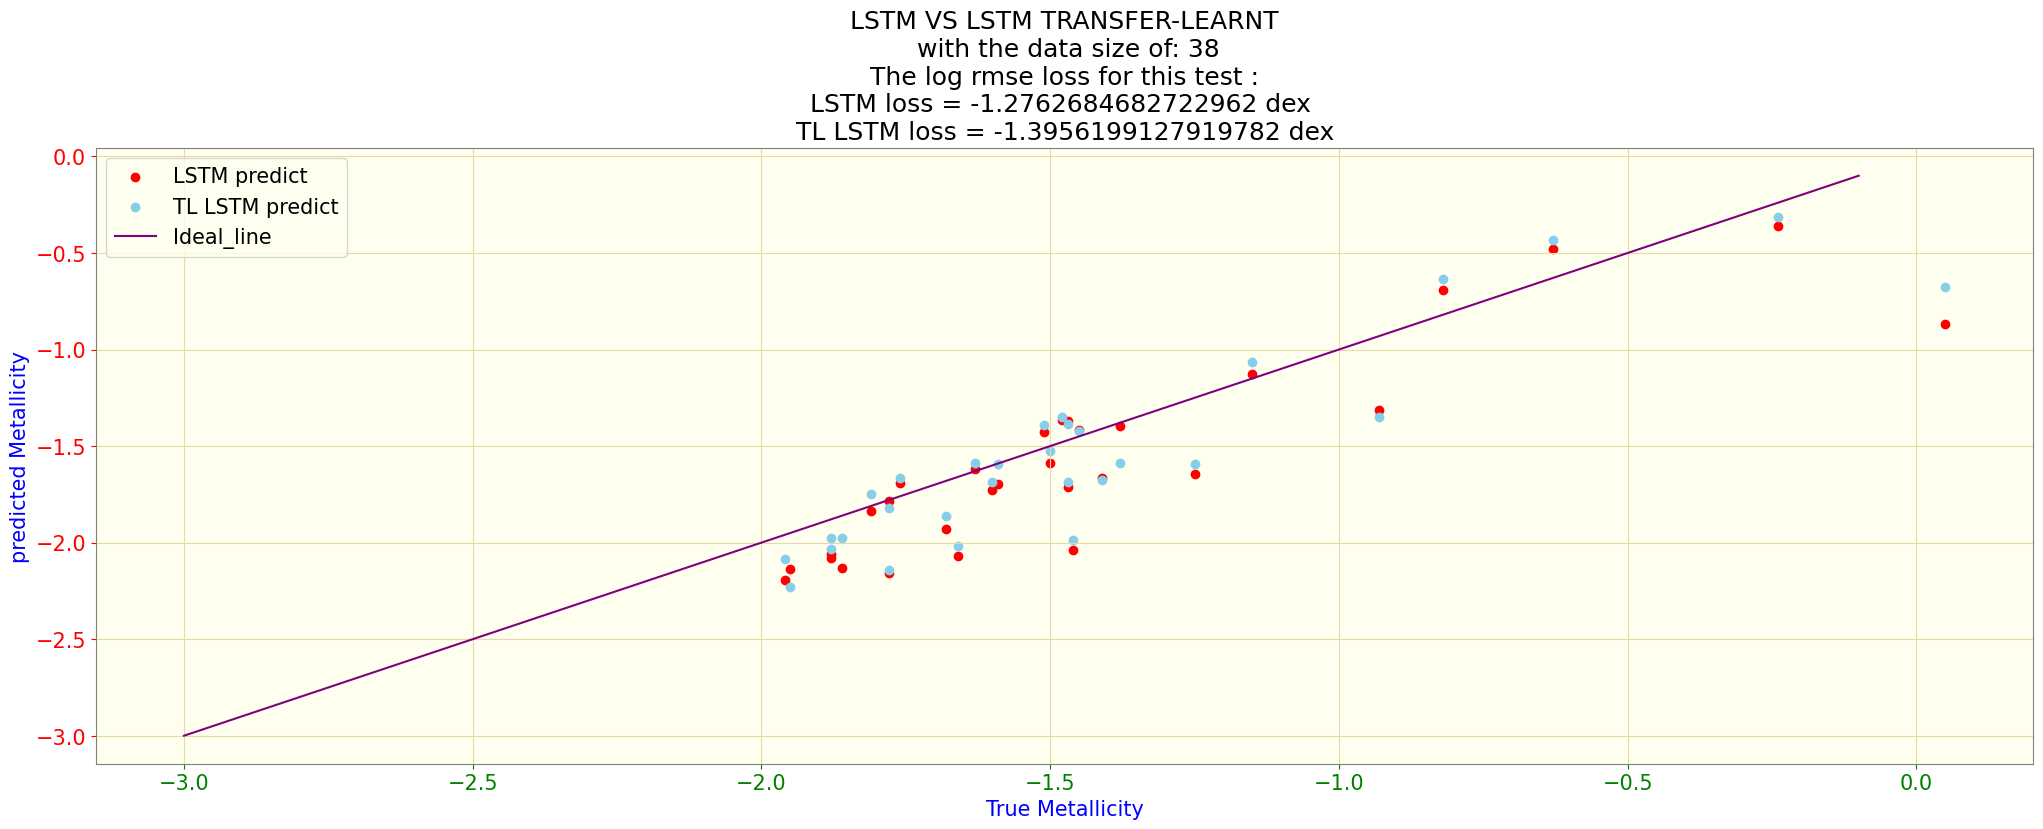

In [123]:
plt.rcParams['figure.figsize'] = [25, 8]
path_test = '/Users/melikakeshavarz/Desktop/send/Crestani_T/predict_test_gfeh.dat'

data = []
with open(path_test, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

df_pre_test_LT = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
df_pre_test_LT.columns = {'source_id': '0', 'True_test': '1', 'predict_test': '2'}
#print('non duplicate source ids: ', len(df_pre_test_LT.source_id.unique()))


result_test_TL = pd.merge(df_pre_test_LT, result_TL, on = 'source_id', how = 'inner')

#plt.scatter(result_test_TL.True_test, result_TL.FeH_pre_TL)
plt.scatter(result_test_TL.True_test, result_test_TL.FeH_pre, label = 'LSTM predict', color = 'red')
plt.scatter(result_test_TL.True_test, result_test_TL.predict_test, label = 'TL LSTM predict', color = 'skyblue')
plt.plot([x / 10 for x in range(-30, 0)], [x / 10 for x in range(-30, 0)], color = 'purple', label = 'Ideal_line')
plt.xlabel('True Metallicity')
plt.ylabel('predicted Metallicity')


#-----for test LSTM TL------
mse_TL_test = mean_squared_error(result_test_TL.True_test, result_test_TL.predict_test)

rmse_TL_test = math.sqrt(mse_TL_test)

log_rmse_TL_test = math.log(rmse_TL_test)


#-----for test LSTM--------
mse_test = mean_squared_error(result_test_TL.True_test, result_test_TL.FeH_pre)

rmse_test = math.sqrt(mse_test)

log_rmse_test = math.log(rmse_test)

#-----------------------------


plt.title(f'LSTM VS LSTM TRANSFER-LEARNT\n with the data size of: {len(df_pre_test_LT.source_id.unique())}\n'+
          'The log rmse loss for this test :\n'+
         f'LSTM loss = {log_rmse_test} dex \n'+
         f'TL LSTM loss = {log_rmse_TL_test} dex')
plt.grid(True)
plt.legend(fontsize = 15)
plt.savefig('LSTM_VS_TL_test.png', dpi=300)
#plt.bar(result_test_TL.index, result_test_TL.True_test, color = 'green', label = 'True label')
#plt.bar(result_test_TL.index, result_test_TL.FeH_pre, color = 'red', label = 'LSTM prediction', alpha = 0.4)
#plt.bar(result_test_TL.index, result_test_TL.predict_test, color = 'skyblue', label = 'LSTM TL prediction', alpha = 0.4)





# prediction on Liu dataset (the least accurate one):

In [76]:
!python rrlfeh_nn.py @gfeh.par

Density weighing is ON with cutoff 0.5
Number of input channels: 2
Number of meta features: 0
Number of devices:  1
Default strategy set for CPU
Global batch size = 256
Batch size per replica = 256
                    id  Nep    period  totamp  meanmag  phcov     snr
0  2536241964258088320   32  0.588994   0.807   14.114  0.917   124.1
1  2638915012894951936   27  0.469400   1.148   16.513  0.853  1178.4
2  2536827282401261568   59  0.527019   1.093   16.468  0.936  1010.1
3  2643864395767909376   31  0.587523   0.679   15.592  0.888   313.5
4  2551464805823863680   32  0.563301   0.940   15.655  0.883  1172.7
----------
2181 lines read from ./Liu/meta.dat

1765 lines after threshold rejections

/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/rrlfeh_nn_utils.py:192: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.DataFrame.hist(df, bins=int(np.ceil(np.cbrt(ndata) * 2)), figsize=(20, 10), grid=False, color='red',
Numb

### Predicted:

In [14]:
file = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Liu/target_g.out'

data = []
with open(file, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

df_pre_L = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
df_pre_L.columns = {'source_id': '0', 'FeH_pre': '1', 'FeHerr_pre': '2'}
print(df_pre_L.source_id)
print('non duplicate source ids: ', len(df_pre_L.source_id.unique()))

0       2536241964258088320
1       2638915012894951936
2       2536827282401261568
3       2643864395767909376
4       2551464805823863680
               ...         
1760    4550091931093504896
1761     936507899382640768
1762     312130292901682688
1763     852322825233930112
1764    1316840138346618880
Name: source_id, Length: 1765, dtype: int64
non duplicate source ids:  1765


In [15]:
df_pre_L.head(10)

source_id   FeH_pre  FeHerr_pre
0  2536241964258088320 -2.011536    0.053374
1  2638915012894951936 -1.518255    0.044363
2  2536827282401261568 -1.691826    0.037112
3  2643864395767909376 -2.052467    0.035058
4  2551464805823863680 -1.803651    0.045942
5  2536319582906997248 -1.655943    0.053380
6  2506900736261663360 -1.764356    0.110285
7  2530993372488386176 -1.775829    0.034865
8  2689680353806897152 -1.581154    0.039738
9  2675001912231333632 -1.933200    0.032199

### True :

In [24]:
df_Metal_Liu = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_liu_new.csv')
df_true_L = df_Metal_Liu[['source_id', 'FeH', 'FeH_err']]
df_true_L

source_id    FeH  FeH_err
0     2536241964258088320 -1.907    0.053
1     2638915012894951936 -1.310    0.094
2     2536827282401261568 -1.565    0.053
3     2643864395767909376 -1.714    0.079
4     2551464805823863680 -1.096    0.127
...                   ...    ...      ...
2184   312130292901682688 -0.501    0.077
2185   852322825233930112 -2.000    0.076
2186  1198863915076552960 -1.649    0.053
2187  1316840138346618880 -0.783    0.076
2188  3834029481648387968 -2.550    0.076

[2189 rows x 3 columns]

In [27]:
result_L = pd.merge(df_true_L, df_pre_L, how = 'inner', on = 'source_id')
result_L.to_csv('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Liu/only_metal_T_pre_Liu.csv')
#result_L_1 = result_L[:101] 
#result_L_1

RMSE: 0.3621766346222779


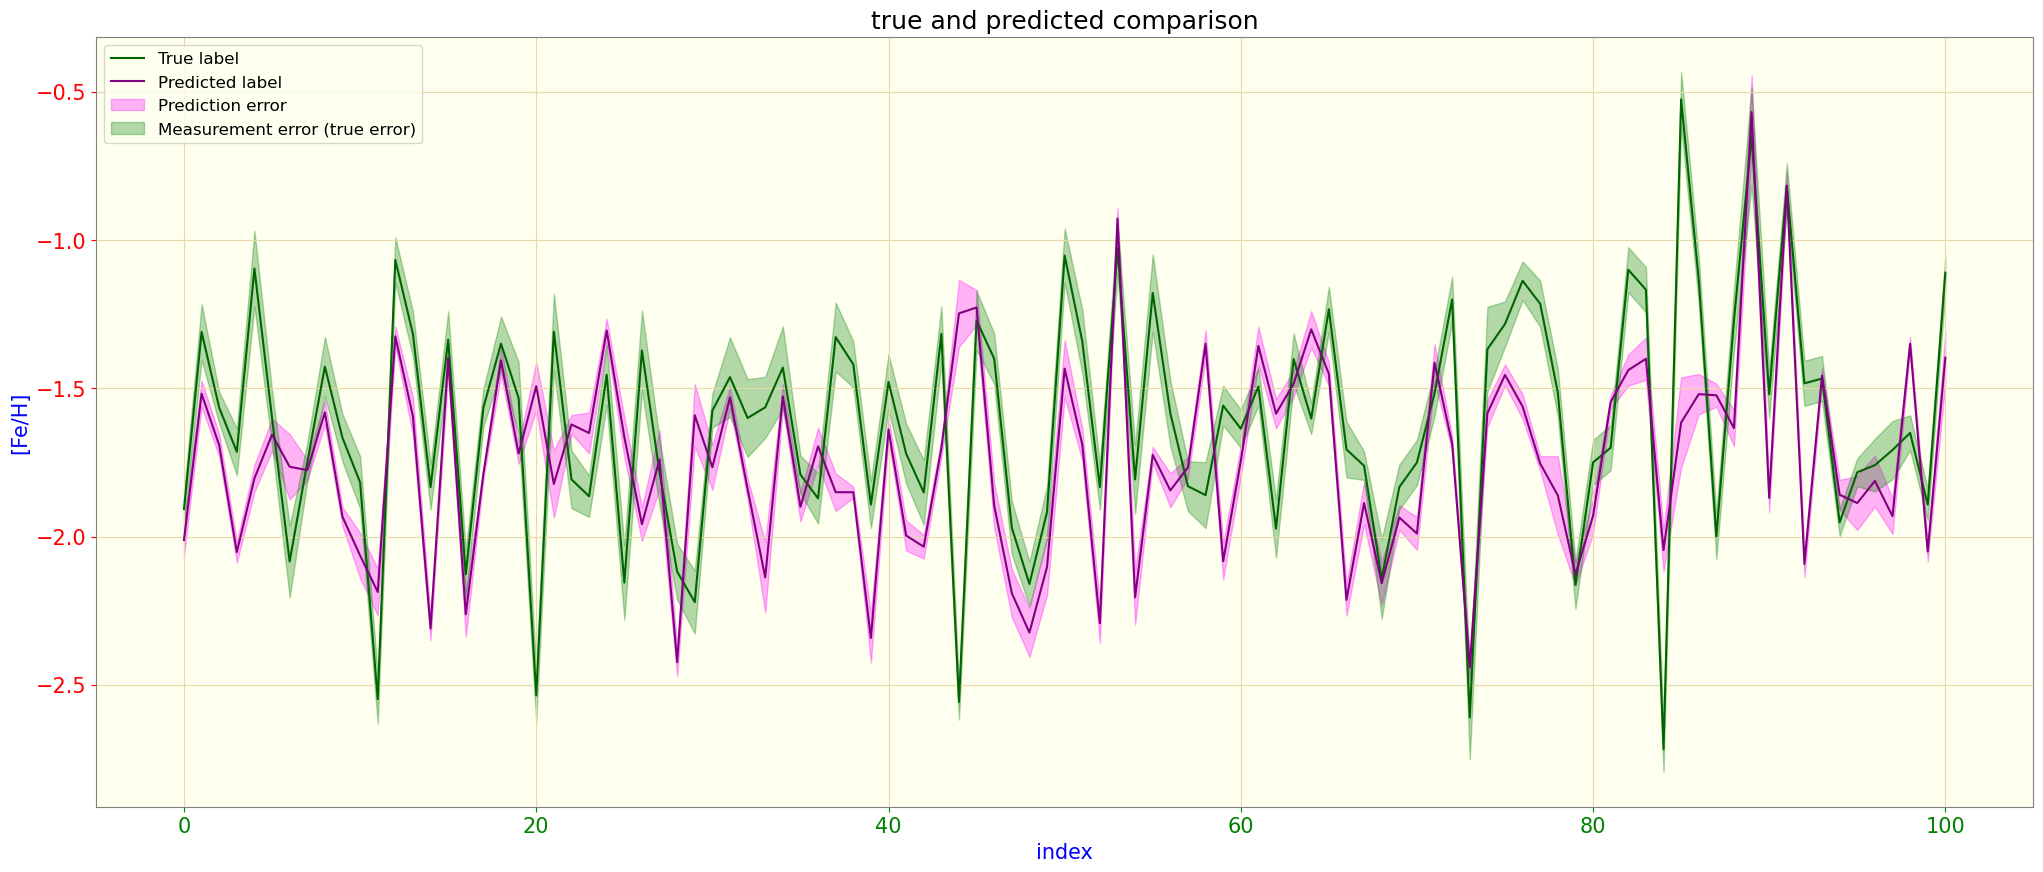

In [22]:
fig, ax = plt.subplots()




ax.plot(result_L_1.index, result_L_1.FeH, color = 'darkgreen', label = 'True label')
ax.plot(result_L_1.index, result_L_1.FeH_pre, color='purple', label = 'Predicted label')

ax.fill_between(result_L_1.index, result_L_1.FeH_pre - result_L_1.FeHerr_pre, result_L_1.FeH_pre + result_L_1.FeHerr_pre,
                 color='magenta', alpha=0.3, label = 'Prediction error')
ax.fill_between(result_L_1.index, result_L_1.FeH - result_L_1.FeH_err , result_L_1.FeH + result_L_1.FeH_err, color = 'green',
              alpha = 0.3, label = 'Measurement error (true error)')

ax.set_xlabel('index')
ax.set_ylabel('[Fe/H]')
ax.set_title('true and predicted comparison')
ax.grid(True)

ax.legend()


print('RMSE:', np.sqrt(mean_squared_error(result_L.FeH, result_L.FeH_pre)))

# Training:

## Training on the Crestani's dataset:

Crestani has 95 stars that 72 stars are accepted by the model due to the constraints that the model considers. Therefore, we split the data to 70% training and 30% test to see the if the prediction on the Crestani data improves.

### Data processing part:

#### 1. The lcfit creates duplicates, also the meta data needs to have FeH, and FeH_e:

In [4]:
# data duplication fixed:


file_path_14 = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani/meta.dat'

data = []
header = []
with open(file_path_14, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
            header.append(out_line)
        else:
            line = line.split()
            data.append(line)
        

df = pd.DataFrame()

df = pd.DataFrame([[x for x in row] for row in data])
df[0] = df[0].astype(int)
header[0].split()
head_dict = {key: value for key, value in zip(header[0].split(), df.columns) }
df.columns = head_dict
df.drop_duplicates(inplace= True)
df.reset_index(drop = True)

df.head(5)

NameError: name 'pd' is not defined

In [258]:
# this is thge metallicity error dataset that we want to add to the final dat file for the input to the dataset.
df_new = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani_new.csv')
df_new[['source_id','FeH', 'FeH_err']]
df_new = df_new.rename(columns = {'source_id': 'id', 'FeH_err': 'FeH_e'})
df_new = df_new[['id', 'FeH', 'FeH_e']]
meta_train = pd.merge(df_new, df, on= 'id', how = 'inner')
meta_train.to_csv('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani_T/meta_train.csv')

In [259]:
meta_train.id = meta_train.id.astype(str)
meta_train.FeH = meta_train.FeH.astype(str)
meta_train.FeH_e = meta_train.FeH_e.astype(str)
meta_train.head(5)

id    FeH FeH_e Nep    period totamp     A1     A2     A3  \
0  6380659528686603008  -1.86  0.01  49  0.550067  0.994  0.319  0.152  0.124   
1  5412243359495900928  -1.84  0.09  59  0.573507  0.745  0.278  0.130  0.080   
2  4055098870077726976   -1.3  0.11  40  0.427283  1.374  0.401  0.188  0.052   
3  6735230515154698880  -0.17  0.04  21  0.367551  1.033  0.344  0.208  0.110   
4  2973954279102006656  -1.66  0.11  67  0.656177  0.744  0.259  0.131  0.077   

    A1_e  ... meanmag_e    cost aper  phcov phcov2     snr   ZPErr Npt order  \
0  0.002  ...     0.001  0.0026    1  0.895  0.924  1131.3  0.0000  49     6   
1  0.004  ...     0.003  0.0100    1  0.928  0.946   312.0  0.0000  59     6   
2  0.004  ...     0.003  0.0079    1  0.886  0.907   694.7  0.0000  40     5   
3  0.018  ...     0.022  0.1228    1  0.822  0.866   162.6  0.0000  21     5   
4  0.006  ...     0.005  0.0360    1  0.944  0.944   180.9  0.0000  67     5   

  minmax  
0  0.845  
1  0.762  
2  0.892  
3  1.044  
4  0.812  

[5 rows x 33 columns]

In [59]:
file_path_dat = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/Crestani_T/meta_train.dat'

with open(file_path_dat, 'w') as f:
    head = '  '.join(meta_train.columns)
    f.write('# '+ head + '\n')
    data = []
    for i in range(len(meta_train)):
        l = ''
        for j in range(len(meta_train.columns)):
            
            if j == 0:
                l = l + meta_train.iloc[i, j] + '   ' # between id and the next column there is a three space gap
            elif j == 30:
                l =  l + '   ' + meta_train.iloc[i, j]
            elif j == 31:
                l =  l + '  ' + meta_train.iloc[i, j]
            else:
                l =  l + ' ' + meta_train.iloc[i, j]
            
        data.append(l)
        
    for line in data:
        f.write(line + '\n')
        
        
   

NameError: name 'meta_train' is not defined

# The Transfer Learning Code:


There were no transfer learning implemented in the model suggested by Dekany. Therefore, we took the model out of the package and instead of parsing the parameter file we made a class like dictionary called pars to deal with flags or parameters.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, Masking
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras import Input, Model
from keras.models import model_from_json
import glob
import os
import io
from tensorflow import keras

In [2]:
import configparser
import sys
import importlib
import os
import glob
import numpy as np
import joblib
import tensorflow as tf
import rrlfeh_nn_utils as ut
import rrlfeh_nn_models as mm
import rrlfeh_nn_io as io
from time import time
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import RepeatedStratifiedKFold, GroupKFold
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler

importlib.reload(io)
importlib.reload(ut)
importlib.reload(mm)
tic = time()

# A Class Dictionary For Parameter file: (needs a couple of modifications)

In [3]:
def find_hashtag_index(line):
    index = line.find("#")
    return index



class Parameters:
    def __init__(self, dictionary):
        self.__dict__ = dictionary


par_file_path = 'gfeh.par'


parameters = {}

# Transfer learning; using the previous model and freezing the interior layers:
with open(par_file_path, 'r') as file:
    for line in file:


        if line.startswith('--'):

            line = line.replace('--', '')
                
            if len(line.split()) == 1:
                key = line.split()
                parameters[key[0]] = True
                
            elif len(line.split()) == 2:
                key, value = line.split()
                if value.isdigit():
                    parameters[key] = int(value)
                elif '.' in value and all(char.isdigit() or char == '.' for char in value):
                    parameters[key] = float(value)
                else:
                    parameters[key] = value
                
                
                
                
            elif len(line.split()) > 1:
                
                if find_hashtag_index(line) == -1:
                    
                    if len(line.split()) > 2 : # for columns we want ['column_1', 'column_2', ....]
                        key, value = (line.split()[0], ' '.join([x for x in line.split()[1:]]))
                        
                        if key != 'subset':
                            key, value = (line.split()[0], [x for x in line.split()[1:]])
                            parameters[key] = value
                            
                        else:
                            parameters[key] = value
                        
                        
                    else:
                        key, value = (line.split()[0], line.split()[1])
                        parameters[key] = value
                        
                    
                    
                    
                else:
                    line = line[:line.index('#')]
                    if len(line.split()) == 1:
                        key = line.split()
                        parameters[key[0]] = True
                    elif len(line.split()) == 2:
                        key, value = (line.split())
                        parameters[key] = value
                    else:
                        key, value = (line.split()[0], ' '.join([x for x in line.split()[1:]]))
                        parameters[key] = value
                

            
        elif line.startswith('#--'):
            line = line.replace('#--', '')
            key = line.split()
            parameters[key[0]] = None
            
            
        else:
            pass



In [4]:
parameters

{'seed': 42,
 'train': True,
 'predict': None,
 'refit': None,
 'cross_validate': True,
 'nn_type': 'rnn',
 'cpu': True,
 'verbose': 0,
 'rootdir': './',
 'outdir': 'Crestani_T/results',
 'input_model_dir': 'results_g/best_model_g',
 'lcdir': 'Crestani_T/DR3_LC_g',
 'input_file': 'Crestani_T/meta_train.dat',
 'target_output_file': 'Crestani_T/target_g.out',
 'wavebands': 'g',
 'lcfile_suffices': '.dat',
 'predict_train_output': 'Crestani_T/predict_train_gfeh',
 'predict_val_output': 'Crestani_T/predict_val_gfeh',
 'predict_test_output': 'Crestani_T/predict_test_gfeh',
 'plot_input_data': True,
 'n_aug': None,
 'save_model': True,
 'save_checkpoints': None,
 'model_file_prefix': 'model',
 'weights_file_prefix': 'weights',
 'metascaler_file': 'gfeh_scaler',
 'log_training': True,
 'plot_prediction': True,
 'nbins': None,
 'max_phase': 1.0,
 'columns': ['id',
  'period',
  'snr',
  'totamp',
  'phcov',
  'Nep',
  'meanmag',
  'FeH',
  'FeH_e'],
 'features': None,
 'subset': None,
 'meta_i

In [5]:
pars = Parameters(parameters)
pars.lcdir = ['Crestani_T/DR3_LC_g']
pars.lcfile_suffices = ['.dat']
pars.liveplotname = None
pars.columns

['id', 'period', 'snr', 'totamp', 'phcov', 'Nep', 'meanmag', 'FeH', 'FeH_e']

Number of devices:  1
Default strategy set for CPU
Global batch size = 256
Batch size per replica = 256
                    id   FeH  FeH_e  Nep    period  totamp  meanmag  phcov  \
0  6380659528686603008 -1.86   0.01   49  0.550067   0.994   12.743  0.895   
1  5412243359495900928 -1.84   0.09   59  0.573507   0.745   11.921  0.928   
2  4055098870077726976 -1.30   0.11   40  0.427283   1.374   11.295  0.886   
3  6735230515154698880 -0.17   0.04   21  0.367551   1.033   12.664  0.822   
4  2973954279102006656 -1.66   0.11   67  0.656177   0.744   15.136  0.944   

      snr  
0  1131.3  
1   312.0  
2   694.7  
3   162.6  
4   180.9  
----------
95 lines read from ./Crestani_T/meta_train.dat



/Users/melikakeshavarz/Desktop/send/rrlfeh_nn_utils.py:192: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  _ = pd.DataFrame.hist(df, bins=int(np.ceil(np.cbrt(ndata) * 2)), figsize=(20, 10), grid=False, color='red',


Number of input phase points: 80

Plotting input data...


Reading time series...


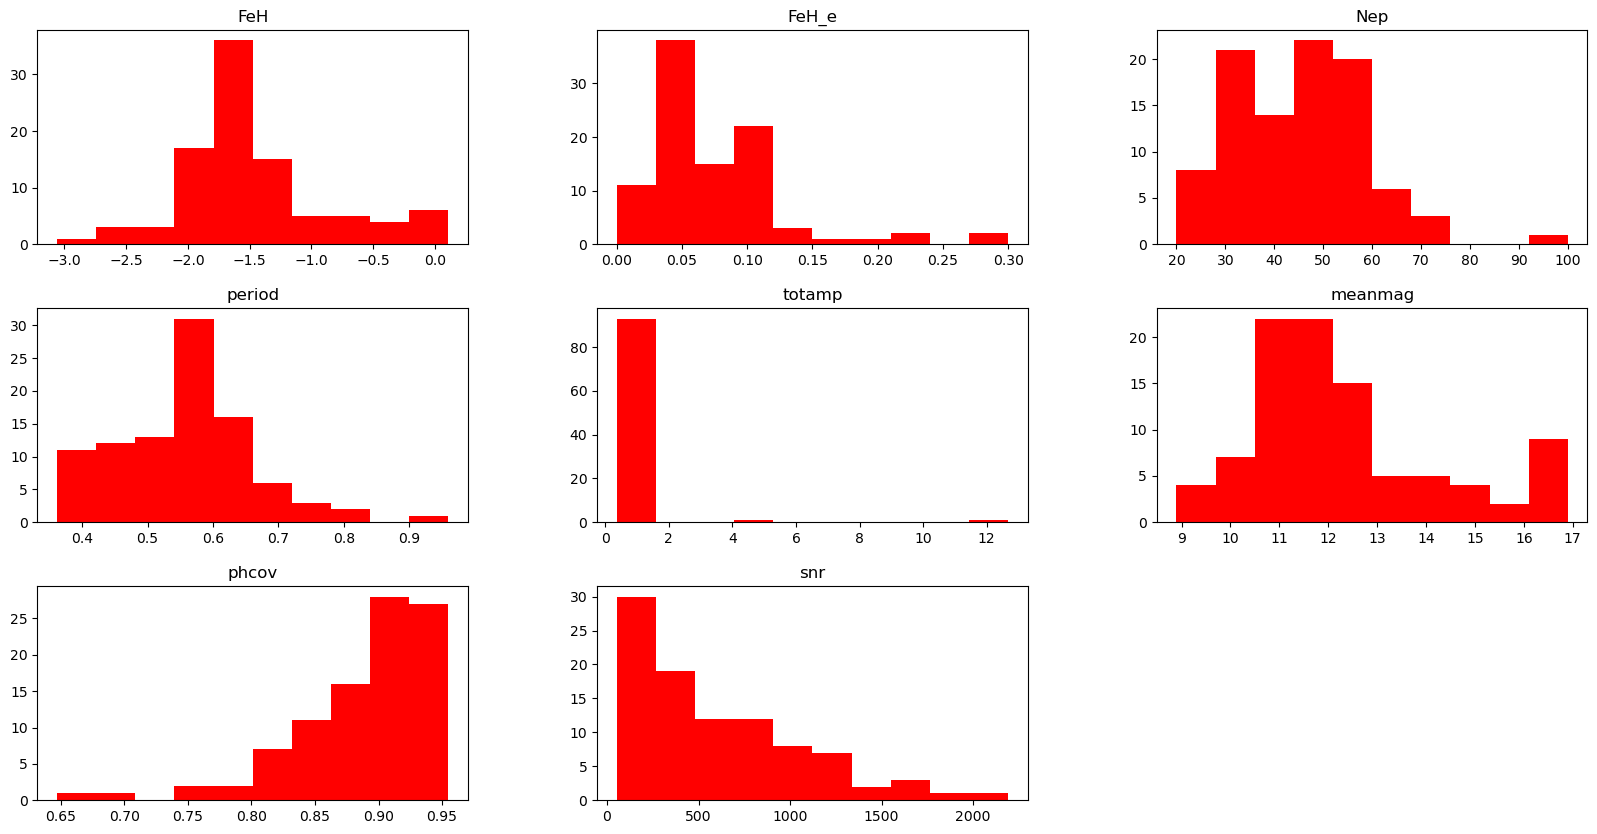

In [6]:
# This is the data
fehcolname = 'FeH'  # column name for the metallicity in the input file
feherrcolname = 'FeH_e'  # column name for the metallicity error in the input file
# idcolumn = 'gaia_DR2_source_id'    # column name for the identifier in the input file
idcolumn = "id"    # column name for the identifier in the input file
figformat = "pdf"
figsuffix = ""
indx_highlight = 40  # index of the input time series to be highlighted on the plots
checkpoint_period = 200  # After how many epochs should model weights be saved?
# nmags = 100  # number of phase points in synthetic light-curves for CNN
nmags = 80
nuse = 3  # use every nuse-th phase as an input feature ( => floor(nmags/nuse) features) for CNN
# Print results for every hyper-parameter combo in CV?
info_gridcv = True
# Minimum number of folds for k_fold CV. If pars.k_fold < min_folds_cv, then stratified shuffle-split is used.
min_folds_cv = 5
min_learning_rate = 1e-3
lr_increment_coeff = 0.48  # at each epoch, min_learning_rate will be multiplied by 10 ** (epoch * lr_increment_coeff)
validation_freq = 1

# ------------------------------
#  COMMAND-LINE PARAMETERS:

# Read parameters from a file or from the command line:
#parser = io.argparser()
# print(len(sys.argv))
#if len(sys.argv) == 1:
    # use default name for the parameter file
#    pars = parser.parse_args([io.default_parameter_file])
#else:
#    pars = parser.parse_args()

#pars = ut.process_input_parameters(pars, min_folds_cv=min_folds_cv)
#np.random.seed(seed=pars.seed)      # random seed for data shuffling

# ------------------------------------------
# SET UP DEVICE(S):

# Check the number of GPUs and set identical memory growth:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # check if there are any GPUs
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print("Number of GPUs:", len(gpus), "physical,", len(logical_gpus), "logical")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

    n_gpus = len(gpus)
else:
    n_gpus = 0

# Set up strategy for multi / single GPU or CPU:

if n_gpus > 1:
    # Calculate batch size in case of multi-device parallel training using mirrored strategy:
    strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
    n_devices = strategy.num_replicas_in_sync
    print("Number of devices: ", n_devices)
    print('Mirrored strategy set for GPUs: ')
    for gpu in gpus:
        print(gpu.name)
    batch_size = pars.batch_size_per_replica * strategy.num_replicas_in_sync

elif n_gpus == 1:
    strategy = tf.distribute.get_strategy()     # default strategy that works on CPU and single GPU
    n_devices = strategy.num_replicas_in_sync
    print("Number of devices: ", n_devices)
    print('Default strategy set for GPU: ', gpus[0].name)
    batch_size = pars.batch_size_per_replica

else:
    strategy = tf.distribute.get_strategy()     # default strategy that works on CPU and single GPU
    n_devices = strategy.num_replicas_in_sync
    print("Number of devices: ", n_devices)
    print('Default strategy set for CPU')
    batch_size = pars.batch_size_per_replica

print("Global batch size = {}".format(batch_size))
print("Batch size per replica = {}".format(pars.batch_size_per_replica))

# ------------------------------------------
# LOSS, METRICS, OPTIMIZATION, MODEL:

# Set the loss, val. metrics, and the optmization algorithm:
with strategy.scope():
    loss = tf.keras.losses.MeanSquaredError()
    # loss = ut.HuberLoss(threshold=0.2)
    # performance evaluation metric to report during training:
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=pars.lr, beta_1=0.9, beta_2=0.999,
                                         epsilon=1e-07, amsgrad=False)
    # metrics = [tf.keras.metrics.RootMeanSquaredError(), ut.get_lr_metric(optimizer)]
    metrics = [tf.keras.metrics.RootMeanSquaredError()]

model = mm.available_models[pars.model]

# model = mm.conv3_2c_f233s1p3s2_gmp_fc64
# model = mm.cnn3_fc_model
# model = mm.lstm2_fc1_model
# model = mm.lstm2_model
# model = mm.bilstm2rd_fc1_model
# model = mm.bilstm2p_model

# ======================================================================================================================
#                                         D A T A    I N P U T

# ------------------------------------------
# READ AND SUBSET THE INPUT METADATA:

input_table, _ = ut.read_dataset(os.path.join(pars.rootdir, pars.input_file), columns=pars.columns,
                                 subset_expr=pars.subset, input_feature_names=pars.features, plothist=True,
                                 histfig=os.path.join(pars.rootdir, pars.outdir, "gfeh_nn_input_table_hist.png"),
                                 dropna_cols=None, comment='#', dtype={idcolumn: str})
n_data = len(input_table)
if pars.nn_type == "cnn":
    nmags = int(nmags / nuse)
else:
    if pars.nbins is not None:
        nmags = pars.nbins

print("Number of input phase points: {}".format(nmags))

ids = input_table[idcolumn].to_numpy().astype(str)
np.savetxt(os.path.join(pars.rootdir, pars.outdir, 'used_ids.lst'), ids.T, fmt="%s")

# Create data matrix for input layer 2 from time-series metadata:
if pars.meta_input is not None:
    X_meta_list = [input_table[feature].to_numpy() for feature in pars.meta_input]
    X_input2 = np.vstack(X_meta_list).T
    print("Shape of the input metadata matrix: {}".format(X_input2.shape))
else:
    X_input2 = None

# ------------------------------------------
# READ (AND PLOT) THE INPUT TIME SERIES:

if pars.nn_type == "cnn":
    # Read time series for a convolutional neural network
    X_input1, X_ts, X_ts_scaled, phases, groups = \
        ut.read_time_series_for_cnn(ids, pars.lcdir, nmags, pars.wavebands, pars.lcfile_suffices,
                                    rootdir=pars.rootdir, nuse=nuse, n_aug=pars.n_aug)
    # Plot input data:
    if pars.plot_input_data:
        for ii, waveband in enumerate(pars.wavebands):
            print("Plotting input data...")

            ut.plot_all_lc(phases, X_ts[waveband], nmags=nmags, shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, pars.outdir, waveband + "_lc_all"),
                           figformat=figformat)
            ut.plot_all_lc(phases, X_ts_scaled[waveband], nmags=nmags, shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, pars.outdir, waveband + "_lc_all_scaled"),
                           figformat=figformat)
            if X_input2 is not None:
                ut.plot_period_amplitude(X_input2, col=1 + ii, waveband=waveband, figformat=figformat,
                                         fname=os.path.join(pars.rootdir, pars.outdir, "logpP-A_" + waveband))

else:
    # Read time series for a recurrent neural network
    pars.n_aug = None  # augmented version not yet implemented
    groups = None
    if pars.meta_input:
        periods_input = None
    else:
        periods_input = input_table['period'].to_numpy()
    X_input1, times, mags, phases = \
        ut.read_time_series_for_rnn(ids, pars.lcdir, nmags, pars.wavebands,
                                    pars.lcfile_suffices, rootdir=pars.rootdir,
                                    periods=periods_input, max_phase=pars.max_phase, phase_shift=None, nbins=pars.nbins)

    # Plot input data:
    if pars.plot_input_data:
        print("Plotting input data...")
        for ii, waveband in enumerate(pars.wavebands):
            ut.plot_all_lc(phases[waveband], mags[waveband], shift=0.0, indx_highlight=indx_highlight,
                           fname=os.path.join(pars.rootdir, waveband + "_lc_all_rnn"),
                           figformat=figformat, nn_type="rnn")

In [7]:
input_table

id   FeH  FeH_e  Nep    period  totamp  meanmag  phcov  \
0   6380659528686603008 -1.86   0.01   49  0.550067   0.994   12.743  0.895   
1   5412243359495900928 -1.84   0.09   59  0.573507   0.745   11.921  0.928   
2   4055098870077726976 -1.30   0.11   40  0.427283   1.374   11.295  0.886   
3   6735230515154698880 -0.17   0.04   21  0.367551   1.033   12.664  0.822   
4   2973954279102006656 -1.66   0.11   67  0.656177   0.744   15.136  0.944   
..                  ...   ...    ...  ...       ...     ...      ...    ...   
90  4473628559603349888 -0.63   0.04   38  0.380686   1.179   12.391  0.905   
91  3839232130153219456 -1.25   0.04   42  0.547791   0.915   16.864  0.920   
92  6897755139944897024 -1.42   0.09   30  0.797453   0.679   12.514  0.901   
93  6836508627130440064 -2.44   0.03   45  0.800075   0.533   12.516  0.843   
94  6589892159047076096 -2.37   0.04   48  0.959801   1.182   12.869  0.854   

       snr  
0   1131.3  
1    312.0  
2    694.7  
3    162.6  
4    180.9  
..     ...  
90  1215.2  
91   760.9  
92   509.7  
93  1122.6  
94  1238.3  

[95 rows x 9 columns]

In [8]:
# handling the 0.0 error ! cheating

for i in range(95):
    if input_table.iloc[i, 2] == 0.0:
        input_table.iloc[i, 2] = 0.01

In [9]:
# We defined the Cross validation again this time with pretrained models:
def cross_validate(model, folds: list, x_list: list or tuple, y,
                   model_kwargs: dict = {}, compile_kwargs: dict = {},
                   initial_weights: list = None,
                   sample_weight_fit=None, sample_weight_eval=None, ids=None,
                   indices_to_scale: list or tuple = None, scaler=None,
                   n_epochs: int = 1, batch_size: int = None, shuffle=True, verbose: int = 0,
                   callbacks: list = [], metrics: list or tuple = None,
                   log_training=True, log_prefix='', pick_fold: list or tuple = None,
                   save_data=True, rootdir='.', filename_train='train.dat', filename_val='val.dat',
                   strategy=None, n_devices=1, validation_freq=1, seed=1, num: int = 0):
    histories = list()
    model_weights = list()
    scalers_folds = list()
    Y_train_collected = np.array([])
    Y_val_collected = np.array([])
    Y_train_pred_collected = np.array([])
    Y_val_pred_collected = np.array([])
    fitting_weights_train_collected = np.array([])
    fitting_weights_val_collected = np.array([])
    eval_weights_train_collected = np.array([])
    eval_weights_val_collected = np.array([])
    ids_train_collected = np.array([])
    ids_val_collected = np.array([])
    numcv_t = np.array([])    
    numcv_v = np.array([])
    first_fold = True
    
    
    if ids is None:
        ids = np.linspace(1, y.shape[0], y.shape[0]).astype(int)
    
    for i_cv, (train_index, val_index) in enumerate(folds):
        
        if pars.pick_fold is not None and i_cv + 1 not in pick_fold:
            continue
        tf.keras.backend.clear_session() # clears the keras computation, not the weights
        tf.random.set_seed(pars.seed)
        #model_kwargs['hparams'] = model_kwargs['hparams'].split() # if have some error activate this
        if strategy is not None:
            with strategy.scope():
                model_ = model(**model_kwargs) # Apply distributed strategy on model if multiple devices are present:
                
        else:
            model_ = model(**model_kwargs)
        

        Y_train_pred_en_list = []
        Y_val_pred_en_list = []
        ensemble_models = []
        
       

        #----------------------------Transfer_Learning-----------------------------------------------

        with open('./results_g/best_model_g/model.json', 'r') as json_file:
            loaded_model_json = json_file.read()
        model_ = keras.models.model_from_json(loaded_model_json)
        model_.load_weights(f'./results_g/best_model_g/weights_{num}.h5')
        ensemble_models.append(model_)
        for layer in model_.layers[1: -1]:
            layer.trainable = False
        model_.layers[0].trainable = True
        model_.layers[-1].trainable = True
        if strategy is not None:
            with strategy.scope():
                model_.compile(**compile_kwargs)
        else:
            model_.compile(**compile_kwargs)
            


        print("fold " + str(i_cv + 1) + "/" + str(len(folds)))
        print("n_train = {}  ;  n_val = {}".format(train_index.shape[0], val_index.shape[0]))

        if log_training:
            callbacks_fold = callbacks + [tf.keras.callbacks.CSVLogger(
                os.path.join(rootdir, log_prefix + f"_fold{i_cv + 1}.log"))]
        else:
            callbacks_fold = callbacks

        # --------------------------------------------------
        # Split the arrays to training and validations sets:

        x_train_list = list()
        x_val_list = list()
        scalers = list()
        for i, x in enumerate(x_list):
            x_t, x_v = x[train_index], x[val_index]
            if indices_to_scale is not None and i in indices_to_scale:
                scaler.fit(x_t)
                x_t = scaler.transform(x_t)
                x_v = scaler.transform(x_v)
                scalers.append(scaler.copy())
            x_train_list.append(x_t)
            x_val_list.append(x_v)

        y_train, y_val = y[train_index], y[val_index]

        if sample_weight_fit is not None:
            fitting_weights_train, fitting_weights_val = sample_weight_fit[train_index], sample_weight_fit[val_index]
        else:
            fitting_weights_train, fitting_weights_val = None, None

        if sample_weight_eval is not None:
            eval_weights_train, eval_weights_val = sample_weight_eval[train_index], sample_weight_eval[val_index]
        else:
            eval_weights_train, eval_weights_val = None, None

        ids_t, ids_v = ids[train_index], ids[val_index]

        # --------------------------------------------------
        # Fit and evaluate the model for this fold:

        history = model_.fit(x=x_train_list, y=y_train, sample_weight=fitting_weights_train,
                             epochs=n_epochs, initial_epoch=0, batch_size=batch_size, shuffle=shuffle,
                             validation_data=(x_val_list, y_val, fitting_weights_val),
                             verbose=0, callbacks=callbacks_fold, validation_freq=validation_freq)
        Y_train_pred = (model_.predict(x_train_list)).flatten()
        Y_val_pred = (model_.predict(x_val_list)).flatten()
        histories.append(history)
        model_weights.append(model_.get_weights())
        scalers_folds.append(scalers.copy())

        # --------------------------------------------------
        # Append the values of this fold to those from the previous fold(s).

        Y_train_collected = np.hstack((Y_train_collected, y_train))
        Y_val_collected = np.hstack((Y_val_collected, y_val))
        Y_train_pred_collected = np.hstack((Y_train_pred_collected, Y_train_pred))
        Y_val_pred_collected = np.hstack((Y_val_pred_collected, Y_val_pred))

        if sample_weight_fit is not None:
            fitting_weights_train_collected = np.hstack((fitting_weights_train_collected, fitting_weights_train))
            fitting_weights_val_collected = np.hstack((fitting_weights_val_collected, fitting_weights_val))
        if sample_weight_eval is not None:
            eval_weights_train_collected = np.hstack((eval_weights_train_collected, eval_weights_train))
            eval_weights_val_collected = np.hstack((eval_weights_val_collected, eval_weights_val))
        if ids is not None:
            ids_train_collected = np.hstack((ids_train_collected, ids_t))
            ids_val_collected = np.hstack((ids_val_collected, ids_v))
        numcv_t = np.hstack((numcv_t, np.ones(Y_train_pred.shape).astype(int) * i_cv))
        numcv_v = np.hstack((numcv_v, np.ones(Y_val_pred.shape).astype(int) * i_cv))

        if save_data:
            val_arr = np.rec.fromarrays((ids_v, y_val, Y_val_pred),names=('id', 'true_val', 'pred_val'))
            train_arr = np.rec.fromarrays((ids_t, y_train, Y_train_pred),names=('id', 'true_train', 'pred_train'))
            np.savetxt(os.path.join('./'+ filename_val + '_cv{}.dat'.format(i_cv + 1)), val_arr, fmt='%s %f %f')
            np.savetxt(os.path.join('./'+ filename_train + '_cv{}.dat'.format(i_cv + 1)), train_arr, fmt='%s %f %f')

        # --------------------------------------------------
        # Compute and print the metrics for this fold:

        if metrics is not None:
            for metric in metrics:
                score_train = metric(y_train, Y_train_pred, sample_weight=eval_weights_train)
                score_val = metric(y_val, Y_val_pred, sample_weight=eval_weights_val)
                print(metric.__name__, "  (T) = {0:.3f}".format(score_train))
                print(metric.__name__, "  (V) = {0:.3f}".format(score_val))

    if save_data:
        val_arr = np.rec.fromarrays((ids_val_collected, numcv_v, Y_val_collected, Y_val_pred_collected),
                                    names=('id', 'fold', 'true_val', 'pred_val'))
        train_arr = np.rec.fromarrays((ids_train_collected, numcv_t, Y_train_collected, Y_train_pred_collected),
                                      names=('id', 'fold', 'true_train', 'pred_train'))
        np.savetxt(os.path.join('./', filename_val + '.dat'), val_arr, fmt='%s %d %f %f')
        np.savetxt(os.path.join('./', filename_train + '.dat'), train_arr, fmt='%s %d %f %f')

    cv_train_output = (Y_train_collected, Y_train_pred_collected,eval_weights_train_collected, ids_train_collected, numcv_t)

    cv_val_output = (Y_val_collected, Y_val_pred_collected,eval_weights_val_collected, ids_val_collected, numcv_v)





    return cv_train_output, cv_val_output, model_weights, scalers_folds, histories

        

        





In [11]:
# This is the transfer learning:
if pars.train == True:

    print("Training epochs = " + str(pars.n_epochs))
    print("Learning rate = " + str(pars.lr))
    print("Learning rate decay = " + str(pars.decay))

    hparams_best = None

    # COMPUTE SAMPLE WEIGHTS:

    Y_input = input_table['FeH'].to_numpy()
    Y_e_input = input_table['FeH_e'].to_numpy()

    weights, weights_var, weights_dens = \
        ut.compute_sample_weights(Y_input, y_err=Y_e_input, by_variance=True, by_density=pars.weighing_by_density,
                                  scaled=True, plot=True,
                                  filename=os.path.join(pars.rootdir, pars.outdir,
                                                        "Y_density_weighting"),
                                  xlabel="$[Fe/H]_I$",
                                  figformat=figformat)
    np.any(np.isinf(weights))

    # ------------------------------------------
    # DEFINE DEVELOPMENT (TRAINING + CV) AND TEST SETS: (defining the dev arrays)

    dev_list, test_list = ut.dev_test_split(X_input1, X_input2, Y_input, ids, weights, weights_var,
                                            test_frac=pars.split_frac, groups=groups, seed=pars.seed)
    X_dev1, X_dev2, Y_dev, ids_dev, weights_dev, weights_var_dev = dev_list
    n_dev = Y_dev.shape[0]

    print("n_dev = " + str(n_dev))
    if test_list is not None:
        n_test = test_list[0].shape[0]
        print("n_test  = " + str(n_test))
    else:
        print("No explicit test sample.")
        
     # ------------------------------------------
    # PREPARE ARRAY FOR STRATIFICATION IN Y:

    isort = np.argsort(Y_dev)  # Indices of sorted Y values
    yi = np.zeros(n_dev)
    yi[isort] = np.arange(n_dev)  # Compute Y value order
    yi = np.floor(yi / 20).astype(int)  # compute phase labels for RepeatedStratifiedKFold
    if np.min(np.bincount(yi.astype(int))) < pars.k_fold:  # If too few elements are with last label, ...
        yi[yi == np.max(yi)] = np.max(yi) - 1  # ... the then change that label to the one preceding it
    # ------------------------------------------
    # CHOOSE CROSS-VALIDATION METHOD:

    if pars.k_fold >= min_folds_cv:
        splitter = RepeatedStratifiedKFold(n_splits=pars.k_fold, n_repeats=pars.n_repeats, random_state=pars.seed)
    else:
        print('Cross-validation will be performed by stratified shuffle-split because k_fold < {}'.format(min_folds_cv))
        if pars.n_aug is not None:
            sys.exit('Cannot handle augmented data because scikit-learn.model_selection.StratifiedShuffleSplit'
                     'does not implement group labels. Please specify a k_fold >= {} in order to perform'
                     'repeated stratified k-fold CV instead.'.format(min_folds_cv))
        else:
            splitter = StratifiedShuffleSplit(n_splits=pars.k_fold, test_size=pars.split_frac, random_state=pars.seed)
            pars.n_repeats = 1
    # ------------------------------------------
    # SETUP CALLBACKS:

    callbacks = ut.setup_callbacks(auto_stop=pars.auto_stop, min_delta=float(pars.min_delta), patience=pars.patience,optimize_lr=pars.optimize_lr, min_learning_rate=min_learning_rate,
                                   n_training_epochs=int(pars.n_epochs),
                                   lr_increment_coeff=lr_increment_coeff,
                                   is_checkpoint=pars.save_checkpoints, checkpoint_period=checkpoint_period,
                                   save_model=pars.save_model, n_zoom=pars.n_zoom, n_update=pars.n_update,
                                   eval_metrics=['root_mean_squared_error'], figname='performance')
    # ------------------------------------------
    # PERFORM GRID-SEARCH BY CROSS-VALIDATION:

    metrics_t = {'r2': [], 'wrmse': [], 'wmae': [], 'rmse': [], 'mae': [], 'medae': [], 'jsd_hist': [], 'jsd_kde': []}
    metrics_v = {'r2': [], 'wrmse': [], 'wmae': [], 'rmse': [], 'mae': [], 'medae': [], 'jsd_hist': [], 'jsd_kde': []}

    if pars.cross_validate:


        perf_out = open(os.path.join(pars.rootdir, pars.outdir, 'performance.dat'), 'w')
        perf_out.write("# hparams r2 wrmse wmae rmse mae medae\n")

        model_weights_grid = list()
        scaler_grid = list()
        pars.hparam_grid = [[16, 16, 'l1', 5e-06, 5e-06, 5e-06, 5e-06, 0, 0]]

        for ii, hparams_trial in enumerate(pars.hparam_grid):

            # This tag will be used for naming output files.
            run_tag = model.__name__ + "_w" + str(pars.weighing_by_density) + \
                      "__" + '_'.join(map(str, hparams_trial)) + "_" \
                                                                 "_lr" + str(pars.lr) + "_Nb" + str(
                batch_size)
            # + "_Nep" + "{:.0e}".format(pars.n_epochs)

            results_dir = os.path.join(pars.rootdir, pars.outdir, run_tag)
            if not os.path.isdir(results_dir):
                os.mkdir(results_dir)

            if info_gridcv:
                print('==========================================================')
                print('       Current hyper-parameters: [' + ','.join(map(str, hparams_trial)) + ']')

            # Define scaler and CV splitter:
            # ------------------------------
            metascaler = StandardScaler(copy=True, with_mean=True, with_std=True)
            splitter.random_state = pars.seed
            folds = list(splitter.split(X_dev1, yi, groups=groups))

            # Prepare input data:
            # -------------------
            if pars.meta_input:
                X_dev = (X_dev1, X_dev2)
                indices_to_scale = (1,)
            else:
                X_dev = (X_dev1,)
                indices_to_scale = None

            # Perform cross-validation:
            # -------------------------

            model_kwargs = {'n_timesteps': nmags, 'n_channels': 2,
                            'n_meta': 57, 'hparams': hparams_trial}

            compile_kwargs = {'optimizer': optimizer, 'loss': loss, 'metrics': metrics}

            cv_train_out, cv_val_out, model_weights, scalers, histories = \
                cross_validate(model, folds, X_dev, Y_dev,
                                  model_kwargs=model_kwargs, compile_kwargs=compile_kwargs,
                                  sample_weight_fit=weights_dev, sample_weight_eval=weights_var_dev,
                                  ids=ids_dev, indices_to_scale=indices_to_scale,
                                  scaler=metascaler, n_epochs=int(pars.n_epochs), batch_size=int(batch_size), callbacks=callbacks,
                                  metrics=(r2_score, ut.root_mean_squared_error), log_training=pars.log_training,
                                  log_prefix=run_tag, pick_fold=pars.pick_fold, save_data=True, rootdir=results_dir,
                                  filename_train=pars.predict_train_output + model.__name__ + str(hparams_trial),
                                  filename_val=pars.predict_val_output + model.__name__ + str(hparams_trial),
                                  strategy=strategy, n_devices=n_devices, validation_freq=validation_freq,
                                  seed=int(pars.seed))

            model_weights_grid.append(model_weights)
            scaler_grid.append(scalers)

            Y_train_collected, Y_train_pred_collected, eval_weights_train_collected, ids_train_collected, numcv_t = \
                cv_train_out
            Y_val_collected, Y_val_pred_collected, eval_weights_val_collected, ids_val_collected, numcv_v = cv_val_out

            # Compute regression scores on concatenated CV samples:
            # -----------------------------------------------------
            metrics_t = ut.compute_regression_metrics(Y_train_collected, Y_train_pred_collected, metrics_t,
                                                      sample_weight=eval_weights_train_collected)
            metrics_v = ut.compute_regression_metrics(Y_val_collected, Y_val_pred_collected, metrics_v,
                                                      sample_weight=eval_weights_val_collected)

            jsdh_t, jsdh_v = \
                ut.compute_jsd(Y_train_collected, Y_train_pred_collected, Y_val_collected, Y_val_pred_collected)
            metrics_t['jsd_hist'].append(jsdh_t)
            metrics_v['jsd_hist'].append(jsdh_v)
            jsdk_t, jsdk_v = \
                ut.compute_jsd_kde(Y_train_collected, Y_train_pred_collected, Y_val_collected, Y_val_pred_collected)
            metrics_t['jsd_kde'].append(jsdk_t)
            metrics_v['jsd_kde'].append(jsdk_v)

            # Print results on screen:
            # ------------------------
            if info_gridcv:
                print("\n-------------------------------------------")
                print("\nhparams({}) = {}".format(ii, hparams_trial))
                print("-------------------------------------------")
                print("Regression metrics (on concatenated folds):")
                ut.print_regression_metrics(metrics_t, ii, metrics_1_name="training", metrics_2=metrics_v,
                                            metrics_2_name="   CV   ")
                print("r2 / jsd_hist (CV) = {0:.1f}".format(metrics_v['r2'][ii] / metrics_v['jsd_hist'][ii]))
                print("r2 / jsd_kde  (CV) = {0:.1f}".format(metrics_v['r2'][ii] / metrics_v['jsd_kde'][ii]))
            # Plot the learning curves:
            # -------------------------
            
            ut.progress_plots(histories, os.path.join(results_dir, 'progress_'),
                              start_epoch=50, moving_avg=False, plot_folds=(pars.k_fold > 1),
                              title=str(pars.model) + ', hpars: ' + str(hparams_trial) + ',\n batch size: ' +
                                    str(batch_size) + ', lr: ' + str(pars.lr))

            # Plot training and CV predictions vs true values and their histograms:
            # ---------------------------------------------------------------------
            if pars.plot_prediction:
                ut.plot_predictions(Y_train_collected, Y_train_pred_collected,
                                    y_val_true=Y_val_collected, y_val_pred=Y_val_pred_collected,
                                    rootdir=results_dir, suffix=run_tag + figsuffix, figformat=figformat)

            # Write performance metrics to file:
            # ----------------------------------
            perf_out.write("{0:s} {1:.4f} {2:.4f} {3:.4f} {4:.4f} {5:.4f} {6:.4f}\n"
                           .format(str(hparams_trial), metrics_v['r2'][ii], metrics_v['wrmse'][ii],
                                   metrics_v['wmae'][ii],
                                   metrics_v['rmse'][ii], metrics_v['mae'][ii], metrics_v['medae'][ii]))

            # -------------------------
            # SAVE MODEL ENSEMBLE:

            if pars.save_model and pars.ensemble:
                if not pars.meta_input:
                    scalers = None
                ut.save_model(scaler_file=os.path.join(results_dir, pars.metascaler_file), scaler=scalers,
                              model_file=os.path.join(results_dir, pars.model_file_prefix + run_tag),
                              weights_file=os.path.join(results_dir, pars.weights_file_prefix + run_tag),
                              model=model(**model_kwargs), model_weights=model_weights)

        perf_out.close()
        # ------------------------------------------
        # DETERMINE THE BEST SET OF HYPERPARAMETERS:

        performances = np.array(metrics_v[pars.eval_metric])
        ibest = np.unravel_index(performances.argmax(), performances.shape)[0].astype(int)
        hparams_best = pars.hparam_grid[ibest]
        model_weights_best = model_weights_grid[ibest]
        model_best = model(n_timesteps=nmags, n_channels=2,
                           n_meta=57, hparams=hparams_best)
        scalers_best = scaler_grid[ibest]

        if len(pars.hparam_grid) > 1:
            print('==========================================================')
            print('--------------------     RESULTS     ---------------------')
            print("\n-------------------------------------------")
            print("optimal hparams = {}".format(hparams_best))
            print("optimization metric: {}".format(pars.eval_metric))
            print("-------------------------------------------")
            print("Regression metrics (on concatenated folds):")
            ut.print_regression_metrics(metrics_t, ibest, metrics_1_name="training", metrics_2=metrics_v,metrics_2_name="   CV   ")
            
        # --------------------------------------------------
        # EVALUATE BEST MODEL ENSEMBLE ON EXPLICIT TEST SET:

        if pars.explicit_test_frac and pars.ensemble:

            X_test1, X_test2, Y_test, ids_test, weights_test, weights_var_test = test_list
            Y_test_pred_list = list()
            for weights, scaler in zip(model_weights_best, scalers_best):
                model_best.set_weights(weights)
                if pars.meta_input:
                    X_test = (X_test1, scaler.transform(X_test2))
                else:
                    X_test = (X_test1,)
                Y_test_pred_list.append(model_best.predict(X_test).flatten())
            Y_test_pred = np.mean(np.vstack(Y_test_pred_list), axis=0)
            metrics_test = ut.compute_regression_metrics(Y_test, Y_test_pred, sample_weight=weights_test)
            print("----------------------------------------")
            print("Performance on explicit test set:\n")
            ut.print_regression_metrics(metrics_test, 0, metrics_1_name="  TEST  ")

            test_arr = np.rec.fromarrays((ids_test, Y_test, Y_test_pred),
                                         names=('id', 'true_test', 'pred_test'))
            np.savetxt(pars.predict_test_output + ".dat", test_arr, fmt='%s %f %f')
            

            
    # ------------------------------------------
    # REFIT THE BEST MODEL ON THE ENTIRE DEVELOPMENT SET:

    if pars.refit:
        print('------------------------------------')
        print("Fitting model to the development set...")

        if hparams_best is None:
            hparams_best = pars.hparam_grid[0]

        run_tag = model.__name__ + "_w" + str(pars.weighing_by_density) + "_" + str(hparams_best) + \
                  "_lr" + str(pars.lr) + "_Nb" + str(batch_size) + "_Nep" + "{:.0e}".format(pars.n_epochs)

        if pars.log_training:
            callbacks.append(tf.keras.callbacks.CSVLogger(run_tag + ".log"))

        tf.keras.backend.clear_session()
        tf.random.set_seed(pars.seed)
        # Define and compile model:

        with strategy.scope():
            model_ = model(n_timesteps=nmags, n_channels=2, n_meta=pars.n_meta, hparams=hparams_best)
            model_.compile(optimizer=optimizer, loss=loss, metrics=metrics)

        if pars.meta_input:
            # Standard-scale data:
            metascaler = StandardScaler(copy=True, with_mean=True, with_std=True)
            metascaler.fit(X_dev2)
            X_dev2 = metascaler.transform(X_dev2)
            X_dev = (X_dev1, X_dev2)
        else:
            metascaler = None
            X_dev = (X_dev1,)

        hist_refit = model_.fit(x=X_dev, y=Y_dev, epochs=pars.n_epochs, batch_size=batch_size,
                                sample_weight=weights_dev, initial_epoch=0, verbose=0,
                                callbacks=callbacks, shuffle=True)
        Y_dev_pred = (model_.predict(X_dev)).flatten()

        if pars.optimize_lr:
            ut.plot_loss_vs_lr(hist_refit, figformat=figformat)

        metrics_dev = ut.compute_regression_metrics(Y_dev, Y_dev_pred, sample_weight=weights_dev)

        print("----------------------------------------")
        print("Performance on refitted development set:\n")
        ut.print_regression_metrics(metrics_dev, 0, metrics_1_name="  DEV   ")

        if pars.save_model:
            ut.save_model(scaler_file=os.path.join(results_dir, pars.metascaler_file), scaler=metascaler,
                          model_file=os.path.join(results_dir, pars.model_file_prefix + run_tag),
                          weights_file=os.path.join(results_dir, pars.weights_file_prefix + run_tag), model=model_)
            print("\n -- Saved refitted model to disk. --")

        # Plot the loss and the accuracy as functions of the training epoch:
        ut.progress_plots([hist_refit], os.path.join(results_dir, pars.progress_plot_subdir, "refit_" + run_tag),
                          title=str(model_.name) + ', hpars: ' + str(hparams_best) + ',\n batch size: ' +
                                str(batch_size) + ', lr: ' + str(pars.lr),
                          start_epoch=200, moving_avg=False, plot_folds=False)
        # ------------------------------------------
        # EVALUATE THE REFITTED MODEL ON AN EXPLICIT TEST SET:

        if pars.explicit_test_frac:

            X_test1, X_test2, Y_test, ids_test, weights_test, weights_var_test = test_list
            if pars.meta_input:
                X_test = (X_test1, metascaler.transform(X_test2))
            else:
                X_test = (X_test1,)
            Y_test_pred = model_.predict(X_test).flatten()
            metrics_test = ut.compute_regression_metrics(Y_test, Y_test_pred, sample_weight=weights_test)
            print("----------------------------------------")
            print("Performance on explicit test set:\n")
            ut.print_regression_metrics(metrics_test, 0, metrics_1_name="  TEST  ")

            test_arr = np.rec.fromarrays((ids_test, Y_test, Y_test_pred),
                                         names=('id', 'true_test', 'pred_test'))
            np.savetxt(pars.predict_test_output + ".dat", test_arr, fmt='%s %f %f')








Training epochs = 5000
Learning rate = 0.01
Learning rate decay = 5e-05
n_dev = 57
n_test  = 38
       Current hyper-parameters: [16,16,l1,5e-06,5e-06,5e-06,5e-06,0,0]
fold 1/5
n_train = 45  ;  n_val = 12


Restoring model weights from the end of the best epoch: 299.
Epoch 1299: early stopping
1/1 [==============================] - 0s 12ms/step
r2_score   (T) = 0.980
r2_score   (V) = 0.923
root_mean_squared_error   (T) = 0.119
root_mean_squared_error   (V) = 0.096
fold 2/5
n_train = 45  ;  n_val = 12


Restoring model weights from the end of the best epoch: 1.
Epoch 1001: early stopping
1/1 [==============================] - 0s 11ms/step
r2_score   (T) = 0.905
r2_score   (V) = 0.867
root_mean_squared_error   (T) = 0.240
root_mean_squared_error   (V) = 0.215
fold 3/5
n_train = 46  ;  n_val = 11


Restoring model weights from the end of the best epoch: 1.
Epoch 1001: early stopping
1/1 [==============================] - 0s 11ms/step
r2_score   (T) = 0.901
r2_score   (V) = 0.918
root_mean_squared_error   (T) = 0.240
root_mean_squared_error   (V) = 0.193
fold 4/5
n_train = 46  ;  n_val = 11


Restoring model weights from the end of the best epoch: 9.
Epoch 1009: early stopping
1/1 [==============================] - 0s 11ms/step
r2_score   (T) = 0.937
r2_score   (V) = 0.931
root_mean_squared_error   (T) = 0.195
root_mean_squared_error   (V) = 0.164
fold 5/5
n_train = 46  ;  n_val = 11


Restoring model weights from the end of the best epoch: 2120.
Epoch 3120: early stopping
1/1 [==============================] - 0s 12ms/step
r2_score   (T) = 0.965
r2_score   (V) = 0.967
root_mean_squared_error   (T) = 0.097
root_mean_squared_error   (V) = 0.157

-------------------------------------------

hparams(0) = [16, 16, 'l1', 5e-06, 5e-06, 5e-06, 5e-06, 0, 0]
-------------------------------------------
Regression metrics (on concatenated folds):
  metric  |  training   |     CV      |
 --------------------------------------
 r2       |     0.9332  |     0.9642  |
 wrmse    |     0.1980  |     0.1449  |
 wmae     |     0.1525  |     0.1145  |
 rmse     |     0.2182  |     0.2219  |
 mae      |     0.1596  |     0.1587  |
 medae    |     0.1127  |     0.1159  |
 jsd_hist |     0.0236  |     0.0203  |
 jsd_kde  |     0.0075  |     0.0035  |
 --------------------------------------

r2 / jsd_hist (CV) = 47.6
r2 / jsd_kde  (CV) = 278.2
2/2 [==============================] - 0s 4ms/s

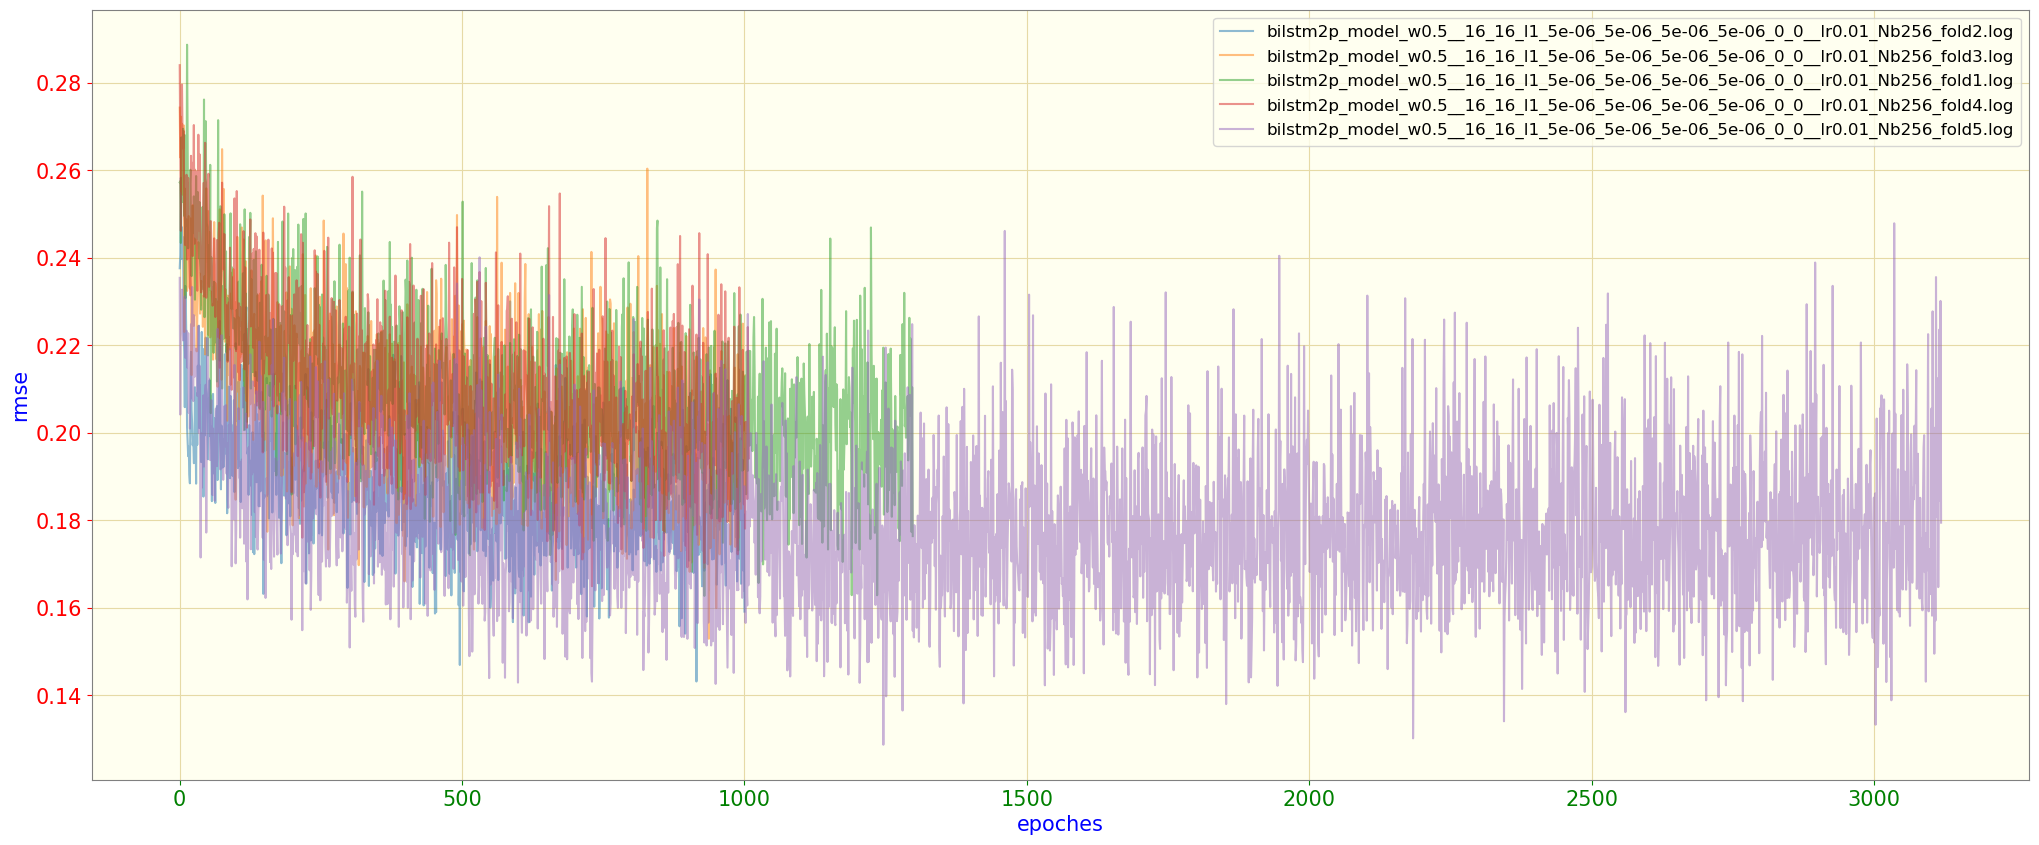

In [129]:
# Logs for transfer learning with rate of 0.01 with 10 folds.
plt.style.use(custom_style_gold)

path_01 = '/Users/melikakeshavarz/Desktop/send/Crestani_T/results/bilstm2p_model_w0.5__16_16_l1_5e-06_5e-06_5e-06_5e-06_0_0__lr0.01_Nb256'

folder_01 = os.listdir(path_01)




for file in folder_01:
    if file.startswith('bils'):
        log_01 = pd.read_csv(path_01+'/' + file)
        plt.plot(log_01.epoch, log_01.root_mean_squared_error, label = f'{file}', alpha = 0.5)


plt.grid(True)
plt.xlabel('epoches')
plt.ylabel('rmse')
plt.legend()






In [20]:
log_01

epoch      loss        lr  root_mean_squared_error  val_loss  \
0         0  0.007153  0.001000                 0.246411  0.003686   
1         1  0.006317  0.001001                 0.226283  0.003638   
2         2  0.008248  0.001002                 0.224779  0.003590   
3         3  0.006112  0.001003                 0.218102  0.003545   
4         4  0.008451  0.001004                 0.220339  0.003497   
...     ...       ...       ...                      ...       ...   
2749   2749  0.001815  0.013977                 0.194838  0.002072   
2750   2750  0.001713  0.013991                 0.160564  0.002102   
2751   2751  0.003969  0.014004                 0.212541  0.002108   
2752   2752  0.002782  0.014017                 0.181154  0.002109   
2753   2753  0.002369  0.014031                 0.208280  0.002126   

      val_root_mean_squared_error  
0                        0.375275  
1                        0.374242  
2                        0.373216  
3                        0.372383  
4                        0.371441  
...                           ...  
2749                     0.302294  
2750                     0.303357  
2751                     0.303160  
2752                     0.302686  
2753                     0.303139  

[2754 rows x 6 columns]

In [29]:
# Changin the parameters for predicting. Remember that we have already tested the model on some unseen crestani lightcurves
# the tested unseen data is more important than this prediction.
pars.predict = True
pars.ensemble = True
pars.meta_input
pars.n_channels = 2



In [36]:
# This is prediting for transfer learning:
if pars.predict:

    model_in = model(n_timesteps= 80, n_channels= 2, n_meta= 57, hparams= [16,  16,  'l1',  5e-6,  5e-6,  5e-6,  5e-6,   0,   0])

    scalers_files_list = None

    if pars.ensemble:
        weights_files_list = glob.glob(os.path.join(pars.rootdir, pars.input_model_dir,
                                                    pars.weights_file_prefix + "_*.h5"))
        if pars.meta_input:
            scalers_files_list = [path_01+'/'+ folder_01[-1]]
    else:
        weights_files_list = []
        if pars.meta_input:
            scalers_files_list = [os.path.join(pars.rootdir, pars.input_model_dir, pars.metascaler_file + ".sav")]
    path_w = '/Users/melikakeshavarz/Desktop/send/Crestani_T/results/bilstm2p_model_w0.5__16_16_l1_5e-06_5e-06_5e-06_5e-06_0_0__lr0.01_Nb256/'
    weights_files = os.listdir(path_w)
    weights_files_list = list()
    
    for w in weights_files:
        if w.startswith('weight'):
            weights_files_list.append(w)
        else:
            pass
    Y_pred_list = list()
    for ii, wf in enumerate(weights_files_list):

        #with open('./results_g/best_model_g/model.json', 'r') as json_file:
        #    loaded_model_json = json_file.read()
        #model_in = keras.models.model_from_json(loaded_model_json)
        model_in.load_weights(path_w + wf)

        if scalers_files_list:
            metascaler_in = joblib.load(scalers_files_list[ii])
            X_input = (X_input1, metascaler_in.transform(X_input2))
        else:
            X_input = (X_input1,)
        Y_pred_list.append(model_in.predict(X_input).flatten())

    if len(Y_pred_list) > 1:
        Y_pred = np.mean(np.vstack(Y_pred_list), axis=0)
        Y_pred_std = np.std(np.vstack(Y_pred_list), axis=0)
        outarr = np.rec.fromarrays((ids, Y_pred, Y_pred_std), names=('id', 'pred', 'pred_std'))
        fmt = '%s %f %f'
    else:
        outarr = np.rec.fromarrays((ids, Y_pred_list[0]), names=('id', 'pred'))
        fmt = '%s %f'
    np.savetxt(os.path.join(pars.rootdir, pars.target_output_file), outarr, fmt=fmt)

3/3 [==============================] - 0s 6ms/step


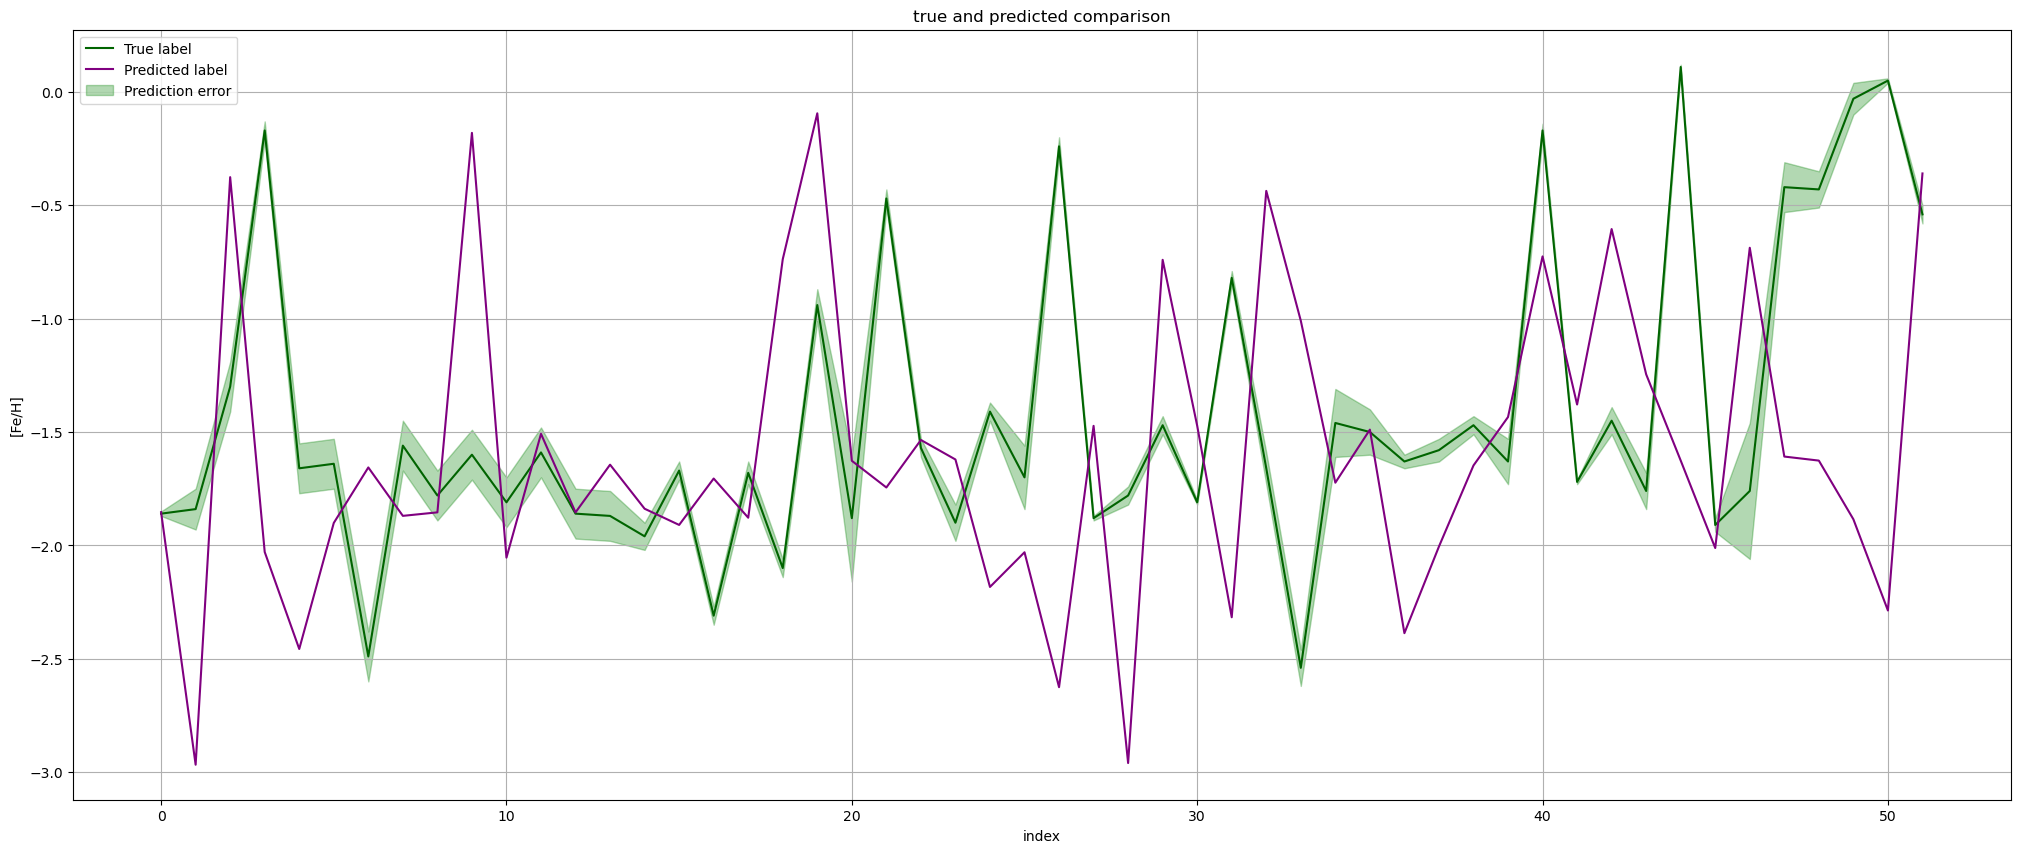

In [165]:
fig, ax = plt.subplots()




ax.plot(pred_train_true.index, pred_train_true.FeH, color = 'darkgreen', label = 'True label')
ax.plot(pred_train_true.index, pred_train_true.FeH_pre, color='purple', label = 'Predicted label')

ax.fill_between(pred_train_true.index, pred_train_true.FeH - pred_train_true.FeH_e, pred_train_true.FeH + pred_train_true.FeH_e,
                 color='green', alpha=0.3, label = 'Prediction error')


ax.set_xlabel('index')
ax.set_ylabel('[Fe/H]')
ax.set_title('true and predicted comparison')
ax.grid(True)

ax.legend()




In [131]:
#with open("/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/results_g/best_model_g/model.json") as json_file:
#    model = model_from_json(json_file.read())

#model.load_weights('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/results_g/best_model_g/weights_4.h5')
#input_layer = model.layers[0]
#output_layer = model.layers[-1]
#model.layers[0].trainable = True
#model.layers[-1].trainable = True
#for layer in model.layers[1: -1]:
#    layer.trainable = False
#optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,
#                                         epsilon=1e-07, amsgrad=False)
#loss = tf.keras.losses.MeanSquaredError()
#model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
#model.fit(X_dev, Y_dev, epochs=500,batch_size=256,
#                                sample_weight=weights_dev, initial_epoch=0, verbose=0,
#                                callbacks=callbacks, shuffle=True)#

# ______________________________________________________________________

# Future project: (web app)


# wrapper of the parameter file and the model:



In [6]:
# D in the train parameters shows the training on the default dataset.
def function(train_D = False, predict_crestani = True, train_crestani = False,
             predict_Liu = False, GRU = False, RNN = True)



with open(gfeh.par, 'r') as f:
    for line in f:
        
        # predict on Crestani data
        if predict_crestani == True:
            data = []
            if line.startswith('--train'):
                out = line.replace('--train', '#--train')
                data.append(out)
            elif line.startswith('#--predict'):
                out = line.replace('#--predict', '--predict')
                data.append(out)
            elif line.startswith('--outdir'):
                outdir = line.split()[1:][0]
                out = line.replace(outdir, 'Crestani/lcfit_crestani/results')
                data.append(out)
            elif line.startswith('--lcdir'):
                lcdir =line.split()[1:]
                out = line.replace(lcdir, 'Crestani/lcfit_crestani/DR3_LC_g')
                data.append(out)
            elif line.startswith('--input_file'):
                input_file = line.split()[1:][0]
                out = line.replace(input_file, 'Crestani/lcfit_crestani/meta.dat')
                data.append(out)
            elif line.startswith('--target_output_file'):
                target_output = line.split()[1:][0]
                out = line.replace(target_output, 'Crestani/lcfit_crestani/target_g.out')
                data.append(out)
            elif line.startswith('--wavebands'):
                band = line.split()[1:][0]
                out = line.replace(band, 'g')
                data.append(out)
            elif line.startswith('--lcfile_suffices'):
                suffices = line.split()[1:]
                out = line.replace(suffices, '.dat')
                data.append(out)

                
            # Data Parameters
            elif line.startswith('--columns   id period snr_g totamp_g phcov_g Nep_g Nep_i totamp_i costN_i phcov_i snr_i meanmag_g FeH FeH_e'):
                out = line.replace('--columns', '#--columns')
                data.append(out)
            elif line.startswith('#--columns    id period snr totamp phcov Nep meanmag'):
                out = line.replace('#--columns', '--columns')
                data.append(out)
            elif line.startswith('--features    id period totamp_g FeH FeH_e'):
                out = line.replace('--features', '#--features')
                data.append(out)
            elif line.starswith('#--features    id period totamp'):
                out = line.replace('#--features', '--features')
                data.append(out)
            elif line.startswith('--subset    period>0.28 and period<0.98 and totamp_i<1.1 and totamp_g<1.4 and phcov_g>0.85 and'):
                out = line.replace('--subset', '#--subset')
                data.append(out)
            elif line.startswith('            Nep_g>20 and snr_g>30 and FeH>-2.7 and FeH<0.0 and FeH_e<0.3'):
                out = '#'+ line
                data.append(out)
            elif line.startswith('#--subset    period>0.28 and period<0.98 and totamp<1.4 and phcov>0.85 and Nep>20 and snr>30'):
                out = line.replace('#--subset', '--subset')
                data.append(out)
            elif line.startswith('--model '):
                out = line.replace('bilstm2p','bilstm2p')
                data.append(out)
                
                
                
                
                
        # predict on Liu data        
        elif predict_Liu == True:
            data = []
             if line.startswith('--train'):
                out = line.replace('--train', '#--train')
                data.append(out)
            elif line.startswith('#--predict'):
                out = line.replace('#--predict', '--predict')
                data.append(out)
            elif line.startswith('--outdir'):
                outdir = line.split()[1:][0]
                out = line.replace(outdir, 'Crestani/lcfit_crestani/results')
                data.append(out)
            elif line.startswith('--lcdir'):
                lcdir =line.split()[1:]
                out = line.replace(lcdir, 'Crestani/lcfit_crestani/LC')
                data.append(out)
            elif line.startswith('--input_file'):
                input_file = line.split()[1:][0]
                out = line.replace(input_file, 'Crestani/lcfit_crestani/meta.dat')
                data.append(out)
            elif line.startswith('--target_output_file'):
                target_output = line.split()[1:][0]
                out = line.replace(target_output, 'Crestani/lcfit_crestani/target_g.out')
                data.append(out)
            elif line.startswith('--wavebands'):
                band = line.split()[1:][0]
                out = line.replace(band, 'g')
                data.append(out)
            elif line.startswith('--lcfile_suffices'):
                suffices = line.split()[1:]
                out = line.replace(suffices, '.dat')
                data.append(out)
            
            
            


                
                
            
                
            
            
            
            
        
        
    